<a href="https://colab.research.google.com/github/zia207/Deep-Neural-Network-Satellite-Image-Classification-in-Google-Colaboratory-iPython-Note-Book-/blob/master/NoteBook/Machine_Learning/Tree_based/03-01-02-02-tree-based-models-bagging-randomforest-r.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![alt text](http://drive.google.com/uc?export=view&id=1bLQ3nhDbZrCCqy_WCxxckOne2lgVvn3l)

# 2.2 Random Forest (RF)

A **Random Forest** is an ensemble machine learning algorithm used for classification, regression, and other tasks. It combines multiple decision trees to improve predictive accuracy and reduce overfitting. Each tree is trained on a random subset of the data and features, and their predictions are aggregated to produce a final output. This tutorial provides an overview of Random Forest, its key characteristics, how it works, and a step-by-step implementation in R from scratch. It also covers the use of the several R packages  such as {randomForest}, {ranger} and {randomForestSRC} packages for practical applications.




## Overview

Random Forest (RF) is a powerful ensemble learning method that builds multiple decision trees and merges them together to get a more accurate and stable prediction. It is widely used in various fields, including finance, healthcare, and marketing, due to its robustness and versatility. RF is particularly effective for high-dimensional datasets and can handle both categorical and continuous variables. It also provides insights into feature importance, helping to identify the most relevant predictors in a dataset.


### Key Characteristics

Random Forest builds a "forest" of decision trees, where each tree is trained independently on a random subset of the dataset. The key ideas are:

1. `Ensemble of Trees`: Uses many decision trees for predictions.
2. `Bagging*` Trains each tree on a random data subset with replacement.
3. `Feature Randomness`: Considers random feature subsets for splits.
4. `Robustness`: Reduces overfitting and handles noise well.
5. `Feature Importance`: Measures variable contribution.
6. `Scalable`: Parallelizable for large datasets.
7. `Handles Missing Data/Outliers`: Robust to incomplete or noisy data.
8. `OOB Error`: Estimates performance using out-of-bag data.
9. `Versatile`: Works for classification, regression, and feature selection.
10. `Hyperparameters`: Tunable (e.g., number of trees, max depth).



## How Random Forest Works

Here’s the step-by-step process:

1. Bootstrap Sampling

Random Forest uses bagging (Bootstrap Aggregating) to create multiple subsets of the training data. For each tree, a random sample of the data is drawn with replacement, typically of the same size as the original dataset.

-   Given a dataset $D$ with $N$ samples, create $T$ bootstrap samples $D_1, D_2, \dots, D_T$. Each $D_t$ is generated by sampling $N$ instances from $D$ with replacement.

-   About 63% of the data is included in each bootstrap sample (due to the 1-$1/e$ rule for sampling with replacement), and the remaining \~37% form the `Out-of-Bag (OOB)` data, used for validation.

2. Building Decision Trees

Each tree is grown on a bootstrap sample, using random feature selection at each split, typically until the tree reaches a maximum depth or a minimum node size.

-   For each bootstrap sample $D_t$, train a decision tree $h_t(x)$.

-   At each node of the tree, instead of considering all $p$ features, randomly select a subset of $m$ features (typically $m = \sqrt{p}$ for `classification` or $m = p/3$ for `regression`).

-   Choose the best split among these $m$ features using a criterion (e.g., Gini impurity for classification, mean squared error for regression).

Each tree is built by recursively splitting the feature space into regions based on feature thresholds. For a node split:

`Classification (Gini Impurity):` For a node with classes $k = 1, 2, \dots, K$, the Gini impurity is:

$$ G = 1 - \sum_{k=1}^K p_k^2 $$

where $p_k$ is the proportion of class \$k in the node. The split minimizes the weighted Gini impurity of child nodes:

$$ \text{Gini}_{\text{split}} = \frac{N_1}{N} G_1 + \frac{N_2}{N} G_2 $$

where $N_1, N_2$ are the sizes of the child nodes, and $G_1, G_2$ are their Gini impurities.

`Regression (Mean Squared Error):` For regression, the split minimizes the variance (or MSE) in the child nodes:

$$ \text{MSE} = \frac{1}{N} \sum_{i=1}^N (y_i - \bar{y})^2 $$

where $\bar{y}$ is the mean target value in the node. The split minimizes:

$$  \text{MSE}_{\text{split}} = \frac{N_1}{N} \text{MSE}_1 + \frac{N_2}{N} \text{MSE}_2 $$

3. Prediction Aggregation

`Classification`:

-   The final prediction is the mode (majority vote) of the predictions from all trees

-   Each tree $h_t(x)$ predicts a class for input $x$. The final prediction is the majority vote across all $T$ trees:

$$ \hat{y} = \text{mode} \{ h_1(x), h_2(x), \dots, h_T(x) \} $$

`Regression`:

-   The final prediction is the mean (or median) of the predictions from all trees

-   Each tree predicts a continuous value, and the final prediction is the average:

$$ \hat{y} = \frac{1}{T} \sum_{t=1}^T h_t(x) $$

4. Out-of-Bag (OOB) Error Estimation

Since each tree is trained on a subset of the data, the remaining (out-of-bag) samples can be used to estimate the model's generalization error without needing a separate validation set.

-   For each sample $x_i$, use only the trees where $x_i$ was not included in the bootstrap sample (OOB data) to make a prediction.

-   Compute the OOB error by comparing these predictions to the true labels. This provides an unbiased estimate of the model’s performance without needing a separate validation set.


Here below is a flowchart illustrating the Random Forest workflow:


![alt text](http://drive.google.com/uc?export=view&id=1s6XQ0x1NvEtWSSVa3__E3xgXl6tuE15R)

---







### Some Key Concepts

#### Bagging

Bagging reduces variance by averaging predictions over $T$ trees trained on bootstrap samples. For regression, the variance of the ensemble prediction is:

$$ \text{Var}(\hat{y}) = \frac{1}{T} \text{Var}(h_t(x)) + \text{Cov}(h_t(x), h_{t'}(x)) $$

Random feature selection reduces the covariance $\text{Cov}(h_t, h_{t'})$ between trees, making the ensemble more robust.

#### Feature Importance

Random Forest measures feature importance by calculating the average decrease in impurity (or MSE) across all splits involving a feature. For feature $j$"

$$ \text{Importance}_j = \frac{1}{T} \sum_{t=1}^T \sum_{\text{nodes using } j} \Delta \text{Impurity} $$

Alternatively, `permutation importance` is computed by shuffling feature $j$’s values and measuring the increase in OOB error.

#### Bias-Variance Tradeoff

A single decision tree has low bias but high variance (overfits). Random Forest reduces variance by averaging over ( T ) trees:

$$ \text{Ensemble Variance} \approx \frac{\text{Single Tree Variance}}{T} \quad (\text{if trees are uncorrelated}) $$

In practice, trees are correlated due to similar data and features, but random feature selection mitigates this.


### Why Random Forest Works

Random Forest works well due to several key factors:

-   `Diversity:` Random sampling of data and features ensures trees are different, reducing overfitting.
-   `Robustness:` Averaging or voting smooths out individual tree errors.
-   `Generalization:` OOB error provides a reliable estimate of performance, and the ensemble is less sensitive to noise.

### Advantages:

-   Handles high-dimensional data well.
-   Robust to outliers and noise.
-   Provides feature importance and OOB error estimates.
-   Works for both classification and regression.

### Limitations:

-   Computationally intensive for large datasets or many trees.
-   Less interpretable than a single decision tree.
-   May not perform as well as gradient boosting for some tasks.

### Key Hyperparameters

-   Number of trees ($T$): More trees reduce variance but increase computation. Typically 100–1000.
-   Number of features ($m$): Smaller $m$ increases randomness, reducing correlation between trees.
-   Max depth or min samples per leaf: Controls tree complexity to prevent overfitting.

## Setup R in Python Runtype

### Install {rpy2}

{rpy2} is a Python package that provides an interface to the R programming language, allowing Python users to run R code, call R functions, and manipulate R objects directly from Python. It enables seamless integration between Python and R, leveraging R's statistical and graphical capabilities while using Python's flexibility. The package supports passing data between the two languages and is widely used for statistical analysis, data visualization, and machine learning tasks that benefit from R's specialized libraries.

In [ ]:
!pip uninstall rpy2 -y
!pip install rpy2==3.5.1
%load_ext rpy2.ipython

### Mount Google Drive

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Random Forest Implementation in R from Scratch

I provide a detailed implementation of Random Forest for both classification (using the Iris dataset) and regression (using the Boston Housing dataset) in R without relying on external packages like randomForest. Since base R does not natively implement Random Forest, I’ll create a simplified version from scratch, including bootstrap sampling, decision tree construction (using base R’s recursive partitioning logic), and ensemble aggregation.

### Function for Bootstrap Sampling

Boostrap sampling is a technique used to create multiple samples from a dataset by randomly selecting observations with replacement. This is a key step in building Random Forest models, as it allows for the creation of diverse training sets for each tree in the forest.   Below is a helper function to perform bootstrap sampling in R:

In [ ]:
%%R
# Set seed for reproducibility
set.seed(123)

# Helper function: Bootstrap sampling
bootstrap_sample <- function(data, n) {
  indices <- sample(1:nrow(data), n, replace = TRUE)
  return(data[indices, ])
}

### Functions for Gini Impurity (classification) and MSE (rergression)

Gini impurity and Mean Squared Error (MSE) are two common metrics used to evaluate the quality of splits in decision trees. Gini impurity is used for classification tasks, while MSE is used for regression tasks. Below are the helper functions to calculate these metrics:

In [ ]:
%%R
# Helper function: Gini impurity for classification
gini_impurity <- function(labels) {
  if (length(labels) == 0) return(0)
  probs <- table(labels) / length(labels)
  return(1 - sum(probs^2))
}

# Helper function: MSE for regression
mse <- function(values) {
  if (length(values) == 0) return(0)
  mean_val <- mean(values)
  return(mean((values - mean_val)^2))
}

### Functions for Building Decision Trees

 `build_tree_class` (Classification): Builds a decision tree for classification, minimizing **Gini impurity**.

  1. **Stop**: Returns majority class if depth ≥ `max_depth`, data < 2 rows, or single class.
  2. **Features**: Randomly selects `m_features` (≈√p) for splitting.
  3. **Split**: Finds split with lowest weighted Gini impurity across features and split points.
  4. **Recurse**: Builds left/right subtrees or returns majority class if no valid split.


 `build_tree_reg` (Regression):  Builds a decision tree for regression, minimizing **MSE**.

  1. **Stop**: Returns mean target value if depth ≥ `max_depth` or data < 2 rows.
  2. **Features**: Randomly selects `m_features` (≈p/3) for splitting.
  3. **Split**: Finds split with lowest weighted MSE.
  4. **Recurse**: Builds left/right subtrees or returns mean if no valid split.


In [ ]:
%%R
# Simplified decision tree node for classification
build_tree_class <- function(data, depth, max_depth, m_features, target_col) {
  if (depth >= max_depth || nrow(data) < 2 || length(unique(data[[target_col]])) == 1) {
    # Leaf node: return most common class
    return(list(leaf = TRUE, class = names(sort(table(data[[target_col]]), decreasing = TRUE))[1]))
  }

  # Select random subset of features (m_features = sqrt(p))
  features <- setdiff(names(data), target_col)
  features <- sample(features, m_features)

  best_gini <- Inf
  best_split <- NULL
  best_feature <- NULL
  best_left <- NULL
  best_right <- NULL

  # Try each feature and possible split
  for (feature in features) {
    values <- sort(unique(data[[feature]]))
    splits <- (values[-length(values)] + values[-1]) / 2

    for (split in splits) {
      left <- data[data[[feature]] <= split, ]
      right <- data[data[[feature]] > split, ]

      if (nrow(left) == 0 || nrow(right) == 0) next

      gini_left <- gini_impurity(left[[target_col]])
      gini_right <- gini_impurity(right[[target_col]])
      weighted_gini <- (nrow(left) / nrow(data)) * gini_left + (nrow(right) / nrow(data)) * gini_right

      if (weighted_gini < best_gini) {
        best_gini <- weighted_gini
        best_split <- split
        best_feature <- feature
        best_left <- left
        best_right <- right
      }
    }
  }

  # If no valid split found, return leaf
  if (is.null(best_feature)) {
    return(list(leaf = TRUE, class = names(sort(table(data[[target_col]]), decreasing = TRUE))[1]))
  }

  # Recursively build left and right subtrees
  left_tree <- build_tree_class(best_left, depth + 1, max_depth, m_features, target_col)
  right_tree <- build_tree_class(best_right, depth + 1, max_depth, m_features, target_col)

  return(list(
    leaf = FALSE,
    feature = best_feature,
    split = best_split,
    left = left_tree,
    right = right_tree
  ))
}

# Simplified decision tree node for regression
build_tree_reg <- function(data, depth, max_depth, m_features, target_col) {
  if (depth >= max_depth || nrow(data) < 2) {
    # Leaf node: return mean value
    return(list(leaf = TRUE, value = mean(data[[target_col]], na.rm = TRUE)))
  }

  # Select random subset of features (m_features = p/3)
  features <- setdiff(names(data), target_col)
  features <- sample(features, m_features)

  best_mse <- Inf
  best_split <- NULL
  best_feature <- NULL
  best_left <- NULL
  best_right <- NULL

  # Try each feature and possible split
  for (feature in features) {
    values <- sort(unique(data[[feature]]))
    splits <- (values[-length(values)] + values[-1]) / 2

    for (split in splits) {
      left <- data[data[[feature]] <= split, ]
      right <- data[data[[feature]] > split, ]

      if (nrow(left) == 0 || nrow(right) == 0) next

      mse_left <- mse(left[[target_col]])
      mse_right <- mse(right[[target_col]])
      weighted_mse <- (nrow(left) / nrow(data)) * mse_left + (nrow(right) / nrow(data)) * mse_right

      if (weighted_mse < best_mse) {
        best_mse <- weighted_mse
        best_split <- split
        best_feature <- feature
        best_left <- left
        best_right <- right
      }
    }
  }

  # If no valid split found, return leaf
  if (is.null(best_feature)) {
    return(list(leaf = TRUE, value = mean(data[[target_col]], na.rm = TRUE)))
  }

  # Recursively build left and right subtrees
  left_tree <- build_tree_reg(best_left, depth + 1, max_depth, m_features, target_col)
  right_tree <- build_tree_reg(best_right, depth + 1, max_depth, m_features, target_col)

  return(list(
    leaf = FALSE,
    feature = best_feature,
    split = best_split,
    left = left_tree,
    right = right_tree
  ))
}

### Functions for Prediction

In [ ]:
%%R
# Predict function for a single tree (classification)
predict_tree_class <- function(tree, row) {
  if (tree$leaf) return(tree$class)

  if (row[[tree$feature]] <= tree$split) {
    return(predict_tree_class(tree$left, row))
  } else {
    return(predict_tree_class(tree$right, row))
  }
}

# Predict function for a single tree (regression)
predict_tree_reg <- function(tree, row) {
  if (tree$leaf) return(tree$value)

  if (row[[tree$feature]] <= tree$split) {
    return(predict_tree_reg(tree$left, row))
  } else {
    return(predict_tree_reg(tree$right, row))
  }
}

### Functions for Random Forest Training



In [ ]:
%%R
# Random Forest for Classification
random_forest_class <- function(data, n_trees, max_depth, m_features, target_col) {
  trees <- list()
  for (i in 1:n_trees) {
    boot_data <- bootstrap_sample(data, nrow(data))
    tree <- build_tree_class(boot_data, 0, max_depth, m_features, target_col)
    trees[[i]] <- tree
  }
  return(trees)
}

# Random Forest for Regression
random_forest_reg <- function(data, n_trees, max_depth, m_features, target_col) {
  trees <- list()
  for (i in 1:n_trees) {
    boot_data <- bootstrap_sample(data, nrow(data))
    tree <- build_tree_reg(boot_data, 0, max_depth, m_features, target_col)
    trees[[i]] <- tree
  }
  return(trees)
}

### Functions for Prediction with Random Forest

In [ ]:
%%R
# Predict with Random Forest (classification)
predict_rf_class <- function(trees, data) {
  predictions <- matrix(NA, nrow = nrow(data), ncol = length(trees))
  for (i in 1:length(trees)) {
    predictions[, i] <- apply(data, 1, function(row) predict_tree_class(trees[[i]], as.list(row)))
  }
  # Majority vote
  final_preds <- apply(predictions, 1, function(row) {
    tab <- table(row)
    names(tab)[which.max(tab)]
  })
  return(final_preds)
}

# Predict with Random Forest (regression)
predict_rf_reg <- function(trees, data) {
  predictions <- matrix(NA, nrow = nrow(data), ncol = length(trees))
  for (i in 1:length(trees)) {
    predictions[, i] <- apply(data, 1, function(row) predict_tree_reg(trees[[i]], as.list(row)))
  }
  # Average predictions
  final_preds <- rowMeans(predictions)
  return(final_preds)
}

### Example Usage: Classification

In [ ]:
%%R
# --- Classification: Iris Dataset ---
data(iris)
iris_data <- iris
target_col_class <- "Species"
n_features_class <- floor(sqrt(ncol(iris_data) - 1))  # sqrt(p)
n_trees <- 50
max_depth <- 3

# Train Random Forest
rf_class <- random_forest_class(iris_data, n_trees, max_depth, n_features_class, target_col_class)

# Predict on training data (for simplicity)
preds_class <- predict_rf_class(rf_class, iris_data)

# Evaluate accuracy
accuracy <- mean(preds_class == iris_data$Species)
cat("Classification Accuracy (Iris):", accuracy, "\n")

Classification Accuracy (Iris): 0.96 


### Example Usage: Regression

In [ ]:
%%R
# --- Regression: Boston Housing Dataset ---
library(MASS)  # For Boston dataset
boston_data <- Boston
target_col_reg <- "medv"
n_features_reg <- floor(ncol(boston_data) / 3)  # p/3
n_trees <- 50
max_depth <- 3

# Train Random Forest
rf_reg <- random_forest_reg(boston_data, n_trees, max_depth, n_features_reg, target_col_reg)

# Predict on training data (for simplicity)
preds_reg <- predict_rf_reg(rf_reg, boston_data)

# Evaluate MSE
mse_val <- mean((preds_reg - boston_data$medv)^2)
mse_val

[1] 14.46388


## Random Forest in R

In R, several packages provide implementations of Random Forest for both classification and regression tasks. Below is a concise list of the most commonly used packages available for Random Forest in R, as of May 14, 2025:

1.  {randomForest}:

   -   The most widely used package for Random Forest in R. It implements Breiman’s Random Forest algorithm for classification and regression.
   -   Supports both classification (`class`) and regression (`regression`).
   -   Provides feature importance, out-of-bag (OOB) error estimates, and proximity measures.
   -   Handles missing data with imputation options.

2.  {ranger}:

  -   A fast implementation of Random Forest, optimized for large datasets and high-dimensional data. It is written in C++ for efficiency.
  -   Supports classification, regression, and survival analysis.
  -   Highly parallelized and memory-efficient.
  -   Offers feature importance and variable selection.

3.  {randomForestSRC}

   -   An extension of the {randomForest} package that provides additional features, including survival analysis and competing risks.
   -   Supports random forests for classification, regression, and survival tasks.
   -   Provides variable selection and partial dependence plots.

4.  {h2o}

  -   An open-source platform for machine learning that includes a scalable Random Forest implementation (Distributed Random Forest, DRF).
  -   Handles large datasets with distributed computing.
  -   Supports classification and regression with advanced features like early stopping.



### Check amd Install Required R Packages

Following R packages are required to run this notebook. If any of these packages are not installed, you can install them using the code below:

In [ ]:
%%R
remotes::install_github("mlr-org/mlr", lib='drive/My Drive/R/')

In [5]:
%%R
packages <- c('tidyverse',
              'plyr',
              'MASS',
              'randomForest',
              'ranger',
              'tuneRanger',
              'mlr',
              'mlr3',
              'mlr3tuning',
              'mlr3learners',
              'randomForestSRC',
              'Metrics',
              'ggpmisc'
         )


#### Install Missing Packages

In [ ]:
%%R
# Install missing packages
new.packages <- packages[!(packages %in% installed.packages(lib='drive/My Drive/R/')[,"Package"])]
if(length(new.packages)) install.packages(new.packages, lib='drive/My Drive/R/')

#### Verify Installation

In [ ]:
%%R
# set library path
.libPaths('drive/My Drive/R')
# Verify installation
cat("Installed packages:\n")
print(sapply(packages, requireNamespace, quietly = TRUE))

Installed packages:
      tidyverse            plyr            MASS    randomForest          ranger 
           TRUE            TRUE            TRUE            TRUE            TRUE 
     tuneRanger             mlr            mlr3      mlr3tuning    mlr3learners 
           TRUE            TRUE            TRUE            TRUE            TRUE 
randomForestSRC         Metrics         metrica         ggpmisc 
           TRUE            TRUE           FALSE            TRUE 


#### Load R Packages

In [6]:
%%R
# set library path
.libPaths('drive/My Drive/R')
# Load packages with suppressed messages
invisible(lapply(packages, function(pkg) {
  suppressPackageStartupMessages(library(pkg, character.only = TRUE))
}))

#### Check Loaded Packages

In [ ]:
%%R
# Check loaded packages
cat("Successfully loaded packages:\n")
print(search()[grepl("package:", search())])# Check loaded packageswer)

Successfully loaded packages:
 [1] "package:ggpmisc"         "package:ggpp"           
 [3] "package:Metrics"         "package:randomForestSRC"
 [5] "package:mlr3learners"    "package:mlr3tuning"     
 [7] "package:paradox"         "package:mlr3"           
 [9] "package:tuneRanger"      "package:lhs"            
[11] "package:parallel"        "package:mlrMBO"         
[13] "package:smoof"           "package:checkmate"      
[15] "package:mlr"             "package:ParamHelpers"   
[17] "package:ranger"          "package:randomForest"   
[19] "package:plyr"            "package:lubridate"      
[21] "package:forcats"         "package:stringr"        
[23] "package:dplyr"           "package:purrr"          
[25] "package:readr"           "package:tidyr"          
[27] "package:tibble"          "package:ggplot2"        
[29] "package:tidyverse"       "package:tools"          
[31] "package:stats"           "package:graphics"       
[33] "package:grDevices"       "package:utils"          
[

## Random Forest Model using {randomForest} package

The {randomForest} package provides a flexible and efficient implementation of Random Forest in R. The function `randomForest()` can be used to fit a Random Forest model for classification or regression tasks.

It provides functions for Random Forest modeling:

1. `randomForest()`: Fits a Random Forest for classification/regression.
2. `tuneRF()`: Tunes `mtry` to minimize OOB error.
3. `predict.randomForest()`: Predicts outcomes for new data.
4. `importance()`: Extracts feature importance scores.
5. `varImpPlot()`: Plots feature importance.
6. `getTree()`: Retrieves a specific tree's structure.
7. `partialPlot()`: Creates partial dependence plots.
8. `MDSplot()`: Visualizes data similarity via proximity matrix.
9. `rfImpute()`: Imputes missing data using proximity.
10. `combine()`: Merges multiple Random Forest models.
11. `grow()`: Adds trees to an existing model.

### Classification Example

For classification, we will use the {randomForest} packages to build a Random Forest model on [Health Iinsurance](http://peopleanalytics-regression-book.org/data/health_insurance.csv) data. The dataset contains information about individuals' choices of insurance products based on various features.


#### Data

Full data set is available for download can download from my [Dropbox](https://www.dropbox.com/scl/fo/2rh6r68i9cxmgortvbw8q/h?rlkey=bvntt66n9mcywprmdki08ch3r&dl=0) or from my [Github](https://github.com/zia207/r-colab/tree/main/Data/Regression_analysis) accounts.

We will build a Random Forest model to predict choice insurance product based on the several features described below:

-   `product`: The choice of product of the individual — A, B or C
-   `age`: The age of the individual when they made the choice
-   `gender`: The gender of the individual as stated when they made the choice
-   `household`: The number of people living with the individual in the same household at the time of the choice
-   `position_level`: Position level in the company at the time they made the choice, where 1 is is the lowest and 5 is the highest
-   `absent`: The number of days the individual was absent from work in the year prior to the choice

We will use `read_csv()` function of {readr} package to import data as a **tidy** data.


In [ ]:
%%R
mf<-readr::read_csv("https://github.com/zia207/r-colab/raw/main/Data/Machine_Learning/health_insurance.csv")
## Convert to factor
mf$product <- as.factor(mf$product)
mf$gender <- as.factor(mf$gender)
levels
# Split Data to Train and Test
seeds = 11076
tr_prop = 0.70
# training data (70% data)
train= plyr::ddply(mf,.(product, gender ),
                 function(., seed) { set.seed(seed); .[sample(1:nrow(.), trunc(nrow(.) * tr_prop)), ] }, seed = 101)
test = plyr::ddply(mf, .(product , gender),
            function(., seed) { set.seed(seed); .[-sample(1:nrow(.), trunc(nrow(.) * tr_prop)), ] }, seed = 101)
print(prop.table(table(train$product)))

Rows: 1448 Columns: 6
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (2): product, gender
dbl (4): age, household, position_level, absent

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.

        A         B         C 
0.3405941 0.3158416 0.3435644 


#### Fit RF Model

We can fit a random forest model using the **randomForest()** function, which implements Breiman's random forest algorithm (based on Breiman and Cutler's original Fortran code) for classification and regression. It can also be used in unsupervised mode for assessing proximities among data points.


The following parameters will be used to fit a RF model:

-   `ntree`: 100, Number of trees to grow. This should not be set to too small a number, to ensure that every input row gets predicted at least a few time

-   `mtry`: 8, Number of variables randomly sampled as candidates at each split. Note that the default values are different for classification (sqrt(p) where p is number of variables in x) and regression (p/3)

-   `nodesize`: 5, Minimum size of terminal nodes. Setting this number larger causes smaller trees to be grown (and thus take less time). Note that the default values are different for classification (1) and regression (5).

-   `maxnode:` 5, Maximum number of terminal nodes trees in the forest can have. If not given, trees are grown to the maximum possible (subject to limits by nodesize). If set larger than maximum possible, a warning is issued.

-   `keep.forest`: TRUE, If set to FALSE, the forest will not be retained in the output object. If xtest is given, defaults to FALSE.

-   `importance`: TRUE, Should importance of predictors be assessed


In [ ]:
%%R
# Fit Random Forest model on training data
set.seed(11076)
rf_model <- randomForest(product ~ age + household + position_level + absent + gender,
                         data = train,
                         ntree = 500,
                         mtry = floor(sqrt(ncol(train) - 1)), # sqrt(p) for classification
                         importance = TRUE)
rf_model


Call:
 randomForest(formula = product ~ age + household + position_level +      absent + gender, data = train, ntree = 500, mtry = floor(sqrt(ncol(train) -      1)), importance = TRUE) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 2

        OOB estimate of  error rate: 20.4%
Confusion matrix:
    A   B   C class.error
A 283  41  20   0.1773256
B  35 262  22   0.1786834
C  45  43 259   0.2536023


#### OOB Error Rate

The OOB error rate is extracted from `rf_model$err.rate` (last value for overall OOB).


In [ ]:
%%R
# Error: Print OOB error rate
cat("OOB Error Rate:", tail(rf_model$err.rate[, "OOB"], 1), "\n")

OOB Error Rate: 0.2039604 


#### Plot Random Forest Model

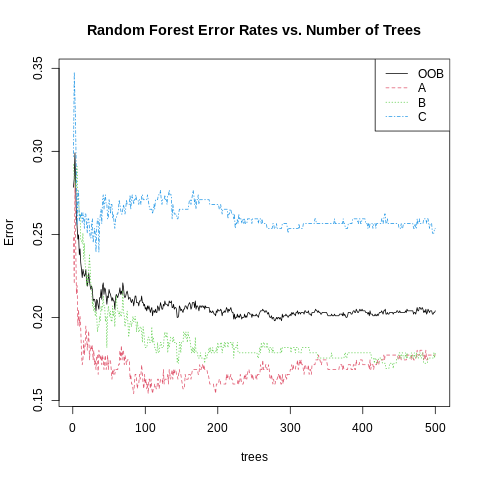

In [ ]:
%%R
plot(rf_model, main = "Random Forest Error Rates vs. Number of Trees")
legend("topright", colnames(rf_model$err.rate), col = 1:4, lty = 1:4)

#### Prediction and Evaluation


In [ ]:
%%R
# Predictions on test set
test$pred <- predict(rf_model, newdata = test)

In [ ]:
%%R
# Confusion Matrix
confusion_matrix<- table(Actual = test$product, Predicted = test$pred)
confusion_matrix

      Predicted
Actual   A   B   C
     A 119  19  11
     B  12 117   9
     C  16  19 116


In [ ]:
%%R
# define variables
    TP <- confusion_matrix[2, 2]
    TN <- confusion_matrix[1, 1]
    FP <- confusion_matrix[2, 1]
    FN <- confusion_matrix[1, 2]

    # accuracy
    accuracy <- (TP + TN) / sum(confusion_matrix)

    # precision
    precision <- TP / (TP + FP)

    # Recall
    recall <- TP / (TP + FN)

    # specificity
    specificity <- TN / (TN + FP)

    # f1_score
    f1_score <- 2 * (precision * recall) / (precision + recall)

    # Print the results
    cat("Accuracy:", accuracy, "\n")
    cat("Precision:", precision, "\n")
    cat("Recall:", recall, "\n")
    cat("Specificity:", specificity, "\n")
    cat("F1 Score:", f1_score, "\n")

Accuracy: 0.5388128 
Precision: 0.9069767 
Recall: 0.8602941 
Specificity: 0.9083969 
F1 Score: 0.8830189 


In [ ]:
%%R
# Per-class Accuracy
per_class_acc <- diag(confusion_matrix) / rowSums(confusion_matrix)
cat("Per-class Accuracy:\n")
print(data.frame(Class = levels(test$product), Accuracy = per_class_acc))

Per-class Accuracy:
  Class  Accuracy
A     A 0.7986577
B     B 0.8478261
C     C 0.7682119


#### Cross-Validation

Cross-validation is a technique used to assess the performance of a machine learning model by partitioning the data into subsets, training the model on some subsets, and validating it on others. This helps to ensure that the model generalizes well to unseen data and reduces the risk of overfitting.

Wwe can implement `k-fold` cross-validation manually, as {randomForest} does not have a built-in cross-validation function.  Below is an R script that performs 5-fold cross-validation, evaluates the model’s performance (accuracy and confusion matrix)


In [ ]:
%%R
# Ensure product and gender are factors for classification
mf$product <- as.factor(mf$product)
mf$gender <- as.factor(mf$gender)

# Verify product is a factor
if (!is.factor(mf$product)) stop("Product is not a factor. Check data.")

# Define number of folds
k <- 5

# Create fold indices
n <- nrow(mf)
fold_size <- floor(n / k)
folds <- rep(1:k, each = fold_size, length.out = n)
folds <- sample(folds)  # Randomize fold assignments

# Initialize storage for results
accuracies <- numeric(k)
conf_matrices <- list()

# Perform 5-fold cross-validation
for (i in 1:k) {
  # Split data into training and test sets
  test_idx <- which(folds == i)
  train_data <- mf[-test_idx, ]
  test_data <- mf[test_idx, ]

  # Fit Random Forest model for classification (default mtry)
  rf_model <- randomForest(
    product ~ age + household + position_level + absent + gender,
    data = train_data,
    ntree = 500,
    importance = TRUE
  )

  # Predict on test fold
  test_pred <- predict(rf_model, newdata = test_data)

  # Compute accuracy
  conf_matrix <- table(test_data$product, test_pred)
  accuracy <- sum(diag(conf_matrix)) / sum(conf_matrix)
  accuracies[i] <- accuracy

  # Store confusion matrix
  conf_matrices[[i]] <- conf_matrix
}

# Aggregate results
mean_accuracy <- mean(accuracies)
sd_accuracy <- sd(accuracies)
cat("Mean Cross-Validation Accuracy:", mean_accuracy, "\n")
cat("Standard Deviation of Accuracy:", sd_accuracy, "\n")

# Sum confusion matrices across folds
agg_conf_matrix <- Reduce("+", conf_matrices)
cat("Aggregate Confusion Matrix:\n")
print(agg_conf_matrix)


Mean Cross-Validation Accuracy: 0.7990141 
Standard Deviation of Accuracy: 0.02394781 
Aggregate Confusion Matrix:
   test_pred
      A   B   C
  A 405  60  28
  B  47 381  29
  C  63  64 371


#### Hyperparameter Tuning

Hyperparameter tuning is the process of selecting the optimal values for a machine learning model's hyperparameters—settings that control the model's learning process but are not learned from the data (e.g., `ntree` and `mtry` in Random Forest). Proper tuning improves model performance by balancing bias and variance.

**Grid Search** is a common hyperparameter tuning method where a predefined set of values (a "grid") is specified for each hyperparameter. The algorithm evaluates the model's performance (e.g., using accuracy or OOB error) for all possible combinations in the grid. For example, if tuning `ntree` (100, 500) and `mtry` (1, 2), grid search tests all four combinations: (100, 1), (100, 2), (500, 1), (500, 2). The combination yielding the best performance is selected.

While effective, grid search can be computationally expensive for large grids. It ensures thorough exploration but may be supplemented with techniques like random search or Bayesian optimization for efficiency in complex models. Details on hyperparameter tuning and grid search  has discussed in the sparete notebook [Hyperparameter Tuning](https://zia207.github.io/r-colab/03-**-**-hyperparameter-tuning-introduction-r.html).

##### Hyperparameter Tuning with `tuneRF()`

{randomForest} package provides a `tuneRF()` function for hyperparameter tuning, which performs a grid search over specified hyperparameter values. Below is an example of how to use `tuneRF()` for tuning the `mtry` parameter in a Random Forest model:

In [ ]:
%%R
# Tune mtry using tuneRF
tune_result <- tuneRF(
  x = train[, c("age", "household", "position_level", "absent", "gender")],
  y = train$product,
  ntreeTry = 500,
  stepFactor = 1.5,
  improve = 0.01,
  trace = TRUE,
  plot = FALSE
)

# Get optimal mtry
best_mtry <- tune_result[which.min(tune_result[, "OOBError"]), "mtry"]
cat("Optimal mtry:", best_mtry, "\n")

# Fit Random Forest with optimal mtry
rf_model_opt_mtry <- randomForest(
  product ~ age + household + position_level + absent + gender,
  data = train,
  ntree = 500,
  mtry = best_mtry,
  importance = TRUE
)

mtry = 2  OOB error = 20.5% 
Searching left ...
Searching right ...
mtry = 3 	OOB error = 21.49% 
-0.04830918 0.01 
Optimal mtry: 2 


##### Hyperparameter Tuning with Grid Search

`Grid`: Tests ntree (100, 500, 1000) and mtry (1, 2, 3, 4). Since there are 5 predictors, mtry values are chosen around √5 ≈ 2.24.

`Metric`: Minimizes OOB error (average error rate across trees for out-of-bag samples).

In [ ]:
%%R
# Define hyperparameter grid
ntree_values <- c(100, 500, 1000)
mtry_values <- c(1, 2, 3, 4)  # sqrt(5) ≈ 2.24, so we try around this value
results <- data.frame(ntree = integer(), mtry = integer(), oob_error = numeric())

# Hyperparameter tuning
for (ntree in ntree_values) {
  for (mtry in mtry_values) {
    # Fit Random Forest model
    rf_model <- randomForest(product ~ age + household + position_level + absent + gender,
                             data = train,
                             ntree = ntree,
                             mtry = mtry,
                             importance = TRUE)

    # Calculate OOB error (1 - OOB accuracy)
    oob_error <- mean(rf_model$err.rate[, "OOB"])

    # Store results
    results <- rbind(results, data.frame(ntree = ntree, mtry = mtry, oob_error = oob_error))
  }
}

#### Best Parameters

In [ ]:
%%R
# Find best parameters (lowest OOB error)
best_params <- results[which.min(results$oob_error), ]
cat("Best parameters: ntree =", best_params$ntree, ", mtry =", best_params$mtry,
    ", OOB Error =", best_params$oob_error, "\n")

Best parameters: ntree = 500 , mtry = 1 , OOB Error = 0.1909882 


#### Fit final model with best parameters

In [ ]:
%%R
# Fit final model with best parameters
final_rf_model <- randomForest(product ~ age + household + position_level + absent + gender,
                               data = train,
                               ntree = best_params$ntree,
                               mtry = best_params$mtry,
                               importance = TRUE)
final_rf_model


Call:
 randomForest(formula = product ~ age + household + position_level +      absent + gender, data = train, ntree = best_params$ntree,      mtry = best_params$mtry, importance = TRUE) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 1

        OOB estimate of  error rate: 18.42%
Confusion matrix:
    A   B   C class.error
A 290  49   5  0.15697674
B  19 289  11  0.09404389
C  52  50 245  0.29394813


#### Prediction and Evaluation

In [ ]:
%%R
# Predict on test set
test_predictions <- predict(final_rf_model, newdata = test)

# Evaluate performance
confusion_matrix <- table(test$product, test_predictions)
accuracy <- sum(diag(confusion_matrix)) / sum(confusion_matrix)
cat("Test set accuracy:", accuracy, "\n")

Test set accuracy: 0.8242009 


#### Feature Importance

The feature importance in Random Forest is a measure of the influence of each feature on the model's accuracy. It is calculated by dividing the importance of each variable by its relative influence on the tree building process (i.e., whether the variable was chosen to split on) and the squared error (decreased across all trees) as a result of this. The significance of a feature in Random Forest is the sum of its importance across all decision trees.

In the context of Random Forest (RF) classification in R, particularly using the `randomForest` package, **variable importance** measures how much each predictor variable contributes to the model's predictive accuracy. Variable importance helps identify which features are most influential in distinguishing between classes. There are two primary methods for calculating variable importance in Random Forest classification: `Mean Decrease in Accuracy` (MDA) and `Mean Decrease in Gini` (MDG). B

`Mean Decrease in Accuracy (MDA)`:

MDA measures the reduction in `prediction accuracy` when a variable’s values are randomly permuted, breaking its association with the response. A larger decrease indicates higher importance. For each tree $t$ in the Random Forest (with $ntree$ trees):

1.  Compute the `out-of-bag (OOB)` error for tree $t$. The OOB sample consists of observations not included in the bootstrap sample used to train tree $t$.

-   Let $E_t$ be the OOB error rate (proportion of misclassified OOB observations).

2.  For each predictor variable $X_j$:

-   Randomly permute the values of $X_j$ in the OOB sample.
-   Recalculate the OOB error rate with the permuted $X_j$, denoted $E_t^{(j)}$.
-   The importance of $X_j$ for tree $t$ is:

$$ VI_t(X_j) = E_t^{(j)} - E_t $$ A positive $VI_t(X_j)$ indicates that permuting $X_j$ increases the error, suggesting $X_j$ is important.

-   Aggregate across all trees:

$$ MDA(X_j) = \frac{1}{ntree} \sum_{t=1}^{ntree} VI_t(X_j) $$

-   Normalize (optional): Divide by the standard deviation of $VI_t(X_j)$ across trees to account for variability:

$$ MDA_{\text{normalized}}(X_j) = \frac{MDA(X_j)}{\text{SD}(VI_t(X_j))} $$

Higher MDA values indicate greater importance. A negative MDA suggests the variable may not contribute to accuracy (permuting it reduces error, possibly due to noise).

`Mean Decrease in Gini (MDG)`:

MDG measures the total reduction in `Gini impurit`\* attributed to a variable across all splits where it is used. Gini impurity quantifies node impurity in classification trees, and variables that consistently reduce impurity are more important.

For a node $n$ with $K$ classes, the Gini impurity is:

$$ Gini(n) = 1 - \sum_{k=1}^K p_k^2 $$

 where $p_k$ is the proportion of class $k$ in node $n$. A lower Gini indicates a purer node.

-   For each tree $t$ in the Random Forest:

1.  For each node $n$ where variable $X_j$ is used to split:

-   Compute the weighted decrease in Gini impurity due to the split:

$$ \Delta Gini(n) = Gini(n) - \left( \frac{N_{left}}{N_n} Gini(n_{left}) + \frac{N_{right}}{N_n} Gini(n_{right}) \right) $$

where $N_n$, $N_{left}$, and $N_{right}$ are the number of observations in node $n$, its left child, and right child, respectively.

-   Weight $\Delta Gini(n)$ by the number of observations in node $n$ relative to the total sample size to reflect its contribution.

2.  Sum the weighted $\Delta Gini(n)$ for all nodes in tree $t$ where $X_j$ is used to split:

     
$$ VI_t(X_j) = \sum_{n \in t, \text{split on } X_j} \Delta Gini(n) \cdot \frac{N_n}{N} $$ where $N$ is the total number of observations.
`

-   Aggregate across all trees:

$$ MDG(X_j) = \frac{1}{ntree} \sum_{t=1}^{ntree} VI_t(X_j) $$

Higher MDG values indicate that $X_j$ is frequently used in splits that significantly reduce node impurity, suggesting greater importance.

In [ ]:
%%R
# Extract variable importance
# Get variable importance from the model fit
ImpData <- as.data.frame(randomForest::importance(final_rf_model))
ImpData$Var.Names <- row.names(ImpData)
ImpData

                       A          B           C MeanDecreaseAccuracy
age            53.078388 25.7279403 43.53135753           51.7176653
household       9.207350 43.3487965 40.17600554           45.0771442
position_level  3.337462 20.1999077 -0.06558994           15.4433736
absent          2.562919  0.1665005 -2.34679003            0.3018391
gender         11.647100 43.9962221 14.70415043           37.9750046
               MeanDecreaseGini      Var.Names
age                   168.18725            age
household             111.66595      household
position_level         22.17886 position_level
absent                 32.46011         absent
gender                 42.71701         gender


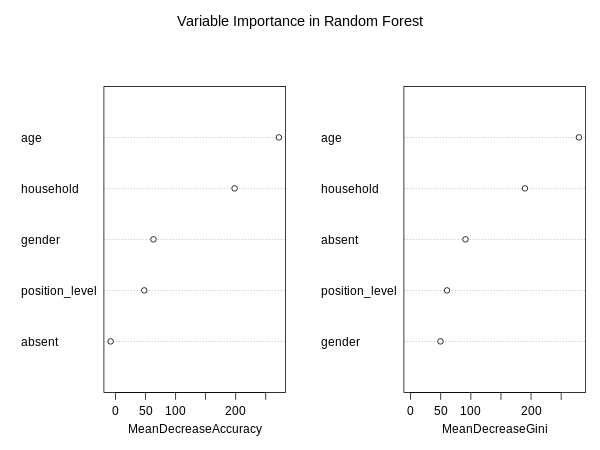

In [ ]:
%%R -w 600 -h 450 -u px
# Plot variable importance
varImpPlot(rf_model, main = "Variable Importance in Random Forest")

We can create a customized variable importance plot with ggplot2:

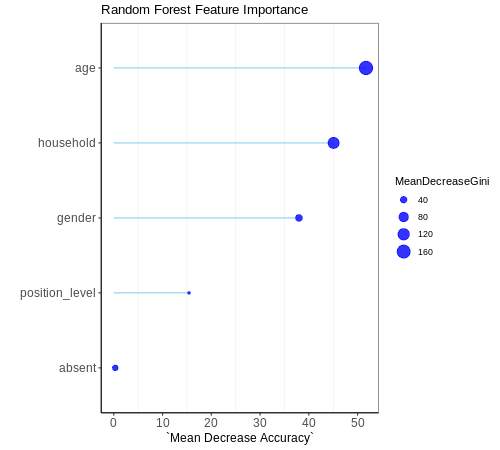

In [ ]:
%%R -w 500 -h 450 -u px
# Plot importance
ggplot(ImpData, aes(y=`MeanDecreaseAccuracy`, x=reorder(Var.Names, +`MeanDecreaseAccuracy`))) +
  geom_segment( aes(x=reorder(Var.Names, +`MeanDecreaseAccuracy`), xend=Var.Names, y=0, yend=`MeanDecreaseAccuracy`), color="skyblue") +
  geom_point(aes(size = MeanDecreaseGini), color="blue", alpha=0.8) +
  ylab('`Mean Decrease Accuracy`') +
  xlab('')+
  theme_bw() +
  theme(axis.line = element_line(colour = "black"),
        panel.grid.major = element_blank(),
        axis.text.y=element_text(size=12),
        axis.text.x = element_text(size=12),
        axis.title.x = element_text(size=12),
        axis.title.y = element_text(size=12))+
  coord_flip()+
  ggtitle("Random Forest Feature Importance")

### Regression Example

In this section, we will build a Random Forest regression model using the {randomForest} package in R. We will use the Boston Housing dataset to predict the median value of owner-occupied homes (`medv`) based on various features.

#### Data

We’ll use the **Boston** dataset from the {MASS} package. The dataset has 506 observations and 14 variables, including the target `medv`. We’ll select all available predictors (13 variables) and convert `chas` to a factor since it’s a binary categorical variable (1 if the tract bounds the Charles River, 0 otherwise).

In [ ]:
%%R
# Load data
data("Boston", library = `MASS`)
# Create a data frame with selected variables
df <- Boston %>%
  dplyr::select(medv, crim, zn, indus, chas, nox, rm, age, dis, rad, tax, ptratio, black, lstat)

# Convert chas to factor (categorical variable)
df$chas <- as.factor(df$chas)

# Convert rad and tax to numeric (in case they are integers or factors)
df$rad <- as.numeric(df$rad)
df$tax <- as.numeric(df$tax)

# Verify data types
str(df)

# Split data into training (70%) and test (30%) sets, stratified by chas
seeds <- 11076
tr_prop <- 0.70
set.seed(seeds)

# Stratified sampling for training data
train <- ddply(df, .(chas),
               function(., seed) { set.seed(seed); .[sample(1:nrow(.), trunc(nrow(.) * tr_prop)), ] },
               seed = seeds)
test <- ddply(df, .(chas),
              function(., seed) { set.seed(seed); .[-sample(1:nrow(.), trunc(nrow(.) * tr_prop)), ] },
              seed = seeds)

# Scale the numeric features (exclude medv and chas)
numeric_cols <- c("crim", "zn", "indus", "nox", "rm", "age", "dis", "rad", "tax", "ptratio", "black", "lstat")
train[numeric_cols] <- scale(train[numeric_cols])
test[numeric_cols] <- scale(test[numeric_cols])

'data.frame':	506 obs. of  14 variables:
 $ medv   : num  24 21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 ...
 $ crim   : num  0.00632 0.02731 0.02729 0.03237 0.06905 ...
 $ zn     : num  18 0 0 0 0 0 12.5 12.5 12.5 12.5 ...
 $ indus  : num  2.31 7.07 7.07 2.18 2.18 2.18 7.87 7.87 7.87 7.87 ...
 $ chas   : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...
 $ nox    : num  0.538 0.469 0.469 0.458 0.458 0.458 0.524 0.524 0.524 0.524 ...
 $ rm     : num  6.58 6.42 7.18 7 7.15 ...
 $ age    : num  65.2 78.9 61.1 45.8 54.2 58.7 66.6 96.1 100 85.9 ...
 $ dis    : num  4.09 4.97 4.97 6.06 6.06 ...
 $ rad    : num  1 2 2 3 3 3 5 5 5 5 ...
 $ tax    : num  296 242 242 222 222 222 311 311 311 311 ...
 $ ptratio: num  15.3 17.8 17.8 18.7 18.7 18.7 15.2 15.2 15.2 15.2 ...
 $ black  : num  397 397 393 395 397 ...
 $ lstat  : num  4.98 9.14 4.03 2.94 5.33 ...


#### Fit Random Forest Model

Fit a Random Forest regression model to predict `medv` using all predictors.


In [ ]:
%%R
# For reproducibility
set.seed(123)
# Fit RF model
rf_model <- randomForest(medv ~ .,
                         data = train,
                         ntree = 500,
                         mtry = 8,
                         nodesize = 5,  # Adjusted for smaller dataset
                         importance = TRUE)

# Model summary
print(rf_model)


Call:
 randomForest(formula = medv ~ ., data = train, ntree = 500, mtry = 8,      nodesize = 5, importance = TRUE) 
               Type of random forest: regression
                     Number of trees: 500
No. of variables tried at each split: 8

          Mean of squared residuals: 11.36368
                    % Var explained: 86.17


#### Plot model error

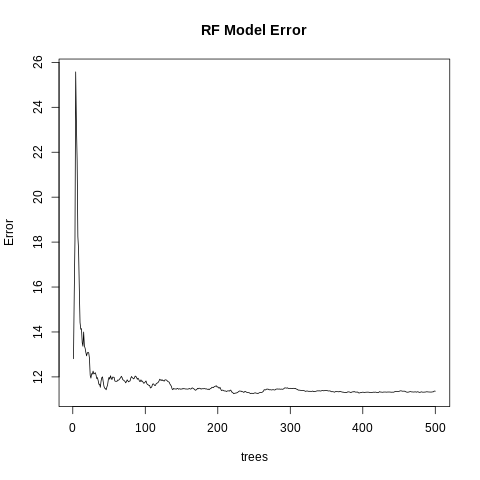

In [ ]:
%%R
# Plot model error
plot(rf_model, main= "RF Model Error")

#### Prediction and Evaluation

In [ ]:
%%R
# Predict on test set
test_predictions <- predict(rf_model, newdata = test)

# Evaluate performance on test set
mse <- mean((test$medv - test_predictions)^2)
r_squared <- 1 - sum((test$medv - test_predictions)^2) / sum((test$medv - mean(test$medv))^2)
cat("Test set MSE:", mse, "\n")
cat("Test set R-squared:", r_squared, "\n")

Test set MSE: 15.78929 
Test set R-squared: 0.8235483 


#### Cross-validation

In [ ]:
%%R
# Create a data frame with selected variables
mf <- Boston %>%
  dplyr::select(medv, crim, zn, indus, chas, nox, rm, age, dis, rad, tax, ptratio, black, lstat)

# Convert chas to factor for regression
mf$chas <- as.factor(mf$chas)

# Convert rad and tax to numeric to avoid scaling issues
mf$rad <- as.numeric(mf$rad)
mf$tax <- as.numeric(mf$tax)

# Verify medv is numeric
if (!is.numeric(mf$medv)) stop("medv is not numeric. Check data.")

# Scale numeric features (excluding medv and chas)
numeric_cols <- c("crim", "zn", "indus", "nox", "rm", "age", "dis", "rad", "tax", "ptratio", "black", "lstat")
mf[numeric_cols] <- scale(mf[numeric_cols])

# Define number of folds
k <- 5

# Create fold indices
set.seed(11076)  # Set seed for reproducibility
n <- nrow(mf)
fold_size <- floor(n / k)
folds <- rep(1:k, each = fold_size, length.out = n)
folds <- sample(folds)  # Randomize fold assignments

# Initialize storage for results
mses <- numeric(k)
r_squareds <- numeric(k)

# Perform 5-fold cross-validation
for (i in 1:k) {
  # Split data into training and test sets
  test_idx <- which(folds == i)
  train_data <- mf[-test_idx, ]
  test_data <- mf[test_idx, ]

  # Fit Random Forest model for regression
  set.seed(11076)  # Set seed for each fold
  rf_model <- randomForest(
    medv ~ crim + zn + indus + chas + nox + rm + age + dis + rad + tax + ptratio + black + lstat,
    data = train_data,
    ntree = 500,
    importance = TRUE
  )

  # Predict on test fold
  test_pred <- predict(rf_model, newdata = test_data)

  # Compute MSE and R-squared
  mse <- mean((test_data$medv - test_pred)^2)
  r_squared <- 1 - sum((test_data$medv - test_pred)^2) / sum((test_data$medv - mean(test_data$medv))^2)
  mses[i] <- mse
  r_squareds[i] <- r_squared
}

# Aggregate results
mean_mse <- mean(mses, na.rm = TRUE)
sd_mse <- sd(mses, na.rm = TRUE)
mean_r2 <- mean(r_squareds, na.rm = TRUE)
sd_r2 <- sd(r_squareds, na.rm = TRUE)
cat("Mean Cross-Validation MSE:", mean_mse, "\n")
cat("Standard Deviation of MSE:", sd_mse, "\n")
cat("Mean Cross-Validation R-squared:", mean_r2, "\n")
cat("Standard Deviation of R-squared:", sd_r2, "\n")


Mean Cross-Validation MSE: 10.83774 
Standard Deviation of MSE: 5.190322 
Mean Cross-Validation R-squared: 0.8680647 
Standard Deviation of R-squared: 0.07532364 


#### Hyperparameter Tuning


##### Hyperparameter Tuning with `tuneRF()`

In [ ]:
%%R
# Tune mtry using tuneRF
tune_result <- tuneRF(
  x = train[, c("crim", "zn", "indus", "chas", "nox", "rm", "age", "dis", "rad", "tax", "ptratio", "black", "lstat")],
  y = train$medv,
  ntreeTry = 500,
  stepFactor = 1.5,
  improve = 0.01,
  trace = TRUE,
  plot = FALSE
)

# Get optimal mtry
best_mtry <- tune_result[which.min(tune_result[, "OOBError"]), "mtry"]
cat("Optimal mtry:", best_mtry, "\n")

# Fit Random Forest with optimal mtry
rf_mtry <- randomForest(
  medv ~ crim + zn + indus + chas + nox + rm + age + dis + rad + tax + ptratio + black + lstat,
  data = train,
  ntree = 500,
  mtry = best_mtry,
  importance = TRUE
)
rf_mtry

mtry = 4  OOB error = 11.53867 
Searching left ...
mtry = 3 	OOB error = 11.83314 
-0.02552019 0.01 
Searching right ...
mtry = 6 	OOB error = 10.99144 
0.04742631 0.01 
mtry = 9 	OOB error = 11.73355 
-0.06751713 0.01 
Optimal mtry: 6 

Call:
 randomForest(formula = medv ~ crim + zn + indus + chas + nox +      rm + age + dis + rad + tax + ptratio + black + lstat, data = train,      ntree = 500, mtry = best_mtry, importance = TRUE) 
               Type of random forest: regression
                     Number of trees: 500
No. of variables tried at each split: 6

          Mean of squared residuals: 11.09759
                    % Var explained: 86.5


##### Hyperparameter Tuning with Grid Search

`Grid`: Tests ntree (100, 500, 1000) and mtry (1, 2, 3, 4). Since there are 5 predictors, mtry values are chosen around √5 ≈ 2.24.

`Metric`: Minimizes OOB error (average error rate across trees for out-of-bag samples).

In [ ]:
%%R
# Ensure chas is a factor
Boston$chas <- as.factor(Boston$chas)

# Verify medv is numeric
if (!is.numeric(Boston$medv)) stop("medv is not numeric. Check data.")

# Split data into training (80%) and test (20%) sets
n <- nrow(Boston)
set.seed(123)
train_idx <- sample(1:n, size = floor(0.8 * n))
train <- Boston[train_idx, ]
test <- Boston[-train_idx, ]

# Define hyperparameter grid
ntree_values <- c(100, 500, 1000)
mtry_values <- c(2, 3, 4, 5)  # sqrt(13) ≈ 3.6, try values around this
results <- data.frame(ntree = integer(), mtry = integer(), oob_mse = numeric())

# Hyperparameter tuning using OOB MSE
for (ntree in ntree_values) {
  for (mtry in mtry_values) {
    # Fit Random Forest regression model
    rf_model <- randomForest(
      medv ~ crim + zn + indus + chas + nox + rm + age + dis + rad + tax + ptratio + black + lstat,
      data = train,
      ntree = ntree,
      mtry = mtry,
      importance = TRUE
    )

    # Extract OOB MSE (last value in mse vector)
    oob_mse <- rf_model$mse[length(rf_model$mse)]

    # Store results
    results <- rbind(results, data.frame(ntree = ntree, mtry = mtry, oob_mse = oob_mse))
  }
}

#### Best Parameters

In [ ]:
%%R
# Find best parameters (lowest OOB MSE)
best_params <- results[which.min(results$oob_mse), ]
cat("Best parameters: ntree =", best_params$ntree, ", mtry =", best_params$mtry,
    ", OOB MSE =", best_params$oob_mse, "\n")

Best parameters: ntree = 500 , mtry = 5 , OOB MSE = 10.05267 


#### Fit final model with best parameters

In [ ]:
%%R
# Fit final model with best parameters
final_rf_model <- randomForest(
  medv ~ crim + zn + indus + chas + nox + rm + age + dis + rad + tax + ptratio + black + lstat,
  data = Boston,
  ntree = best_params$ntree,
  mtry = best_params$mtry,
  importance = TRUE
)
final_rf_model


Call:
 randomForest(formula = medv ~ crim + zn + indus + chas + nox +      rm + age + dis + rad + tax + ptratio + black + lstat, data = Boston,      ntree = best_params$ntree, mtry = best_params$mtry, importance = TRUE) 
               Type of random forest: regression
                     Number of trees: 500
No. of variables tried at each split: 5

          Mean of squared residuals: 9.832403
                    % Var explained: 88.35


#### Prediction and Evaluation

In [ ]:
%%R
test$pred.medv<-predict(final_rf_model, newdata = test)
RMSE<- Metrics::rmse(test$medv, test$pred.medv)
RMSE


[1] 1.464588


`geom_smooth()` using formula = 'y ~ x'


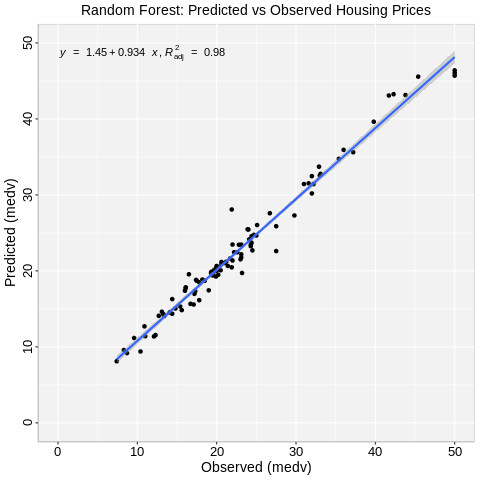

In [ ]:
%%R
library(ggpmisc)
formula <- y ~ x

ggplot(test, aes(medv, pred.medv)) +
  geom_point() +
  geom_smooth(method = "lm") +
  stat_poly_eq(use_label(c("eq", "adj.R2")), formula = formula) +
  ggtitle("Random Forest: Predicted vs Observed Housing Prices") +
  xlab("Observed (medv)") + ylab("Predicted (medv)") +
  scale_x_continuous(limits = c(0, 50), breaks = seq(0, 50, 10)) +
  scale_y_continuous(limits = c(0, 50), breaks = seq(0, 50, 10)) +
  theme(
    panel.background = element_rect(fill = "grey95", colour = "gray75", size = 0.5, linetype = "solid"),
    axis.line = element_line(colour = "grey"),
    plot.title = element_text(size = 14, hjust = 0.5),
    axis.title.x = element_text(size = 14),
    axis.title.y = element_text(size = 14),
    axis.text.x = element_text(size = 13, colour = "black"),
    axis.text.y = element_text(size = 13, angle = 90, vjust = 0.5, hjust = 0.5, colour = "black"))

#### Feature Importance

In the context of a Random Forest regression model using the `randomForest` package in R, **feature importance** (also called variable importance) measures how much each predictor variable contributes to reducing prediction error. For regression, the `randomForest` package provides two primary importance metrics: `%IncMSE` (Percent Increase in Mean Squared Error, equivalent to Mean Decrease in Accuracy) and `IncNodePurity` (Increase in Node Purity, based on Mean Squared Error reduction). Below, I explain how these are calculated for regression, with mathematical details and R implementation.

`%IncMSE (Percent Increase in Mean Squared Error):`

%IncMSE measures the increase in prediction error when a variable’s values are randomly permuted, breaking its association with the response. A larger increase indicates higher importance.

-   For each tree $t$ in the Random Forest (with $ntree$) trees):

1.  Compute the `out-of-bag (OOB)` Mean Squared Error (MSE) for tree $t$. The OOB sample includes observations not used in the bootstrap sample for tree $t$.

-   Let $MSE_t$ be the OOB MSE:

$$ MSE_t = \frac{1}{N_{OOB}} \sum_{i \in OOB} (y_i - \hat{y}_{t,i})^2 $$

where $y_i$ is the true response, $\hat{y}_{t,i}$ is the predicted value, and $N_{OOB}$ is the number of OOB observations.

2.  For each predictor variable $X_j$:

    -   Randomly permute the values of $X_j$ in the OOB sample.

    -   Recalculate the OOB MSE with the permuted $X_j$, denoted $MSE_t^{(j)}$.

    -   The raw importance score for $X_j$ in tree $t$ is:

$$ VI_t(X_j) = MSE_t^{(j)} - MSE_t $$ A positive $VI_t(X_j)$ indicates that permuting $X_j$ increases the error, suggesting importance.

-   Aggregate across all trees:

$$ IncMSE(X_j) = \frac{1}{ntree} \sum_{t=1}^{ntree} VI_t(X_j) $$

-   Convert to percentage (%IncMSE):

$$ \%IncMSE(X_j) = \frac{IncMSE(X_j)}{\text{Mean MSE}} \times 100 $$

where Mean MSE is the average OOB MSE across trees. Alternatively, it’s often reported as the raw $IncMSE$ or normalized by the standard deviation of $VI_t(X_j)$:

$$ \%IncMSE_{\text{normalized}}(X_j) = \frac{IncMSE(X_j)}{\text{SD}(VI_t(X_j))} $$

Higher `%IncMSE` values indicate greater importance. A negative value suggests the variable may not contribute to accuracy (permuting it reduces error, possibly due to noise).

`2. IncNodePurity (Increase in Node Purity)`

IncNodePurity measures the total reduction in `Mean Squared Error (MSE)` attributed to a variable across all splits where it is used. In regression, node purity is defined by MSE, and variables that consistently reduce MSE are more important.

For a node $n$ with $N_n$ observations, the MSE for a node is:

$$ MSE(n) = \frac{1}{N_n} \sum_{i \in n} (y_i - \bar{y}_n)^2 $$

where $\bar{y}_n$ is the mean response in node $n$. A lower MSE indicates a purer node.

-   For each tree $t$

1.  For each node ( n ) where variable $X_j$ is used to split:

-   Compute the weighted decrease in MSE due to the split:

$$ \Delta MSE(n) = MSE(n) - \left( \frac{N_{left}}{N_n} MSE(n\_{left}) + \frac{N_{right}}{N_n} MSE(n\_{right}) \right) $$

where $N_{left}$ and $N_{right}$ are the number of observations in the left and right child nodes.

-   Weight $\Delta MSE(n)$ by the number of observations in node $n$ relative to the total sample size $N$.

2.  Sum the weighted $\Delta MSE(n)$ for all nodes in tree $t$ where $X_j$ is used:

$$ VI_t(X_j) = \sum\_{n \in t, \text{split on } X_j} \Delta MSE(n) \cdot \frac{N_n}{N} $$

-   Aggregate across all trees:

$$ IncNodePurity(X_j) = \frac{1}{ntree} \sum\_{t=1}\^{ntree} VI_t(X_j) $$

Higher `IncNodePurity` values indicate that \$X_j is frequently used in splits that significantly reduce MSE, suggesting greater importance.

##### Feature Importance plot

**varImpPlot()** function create dotchart of variable importance as measured by a Random Forest

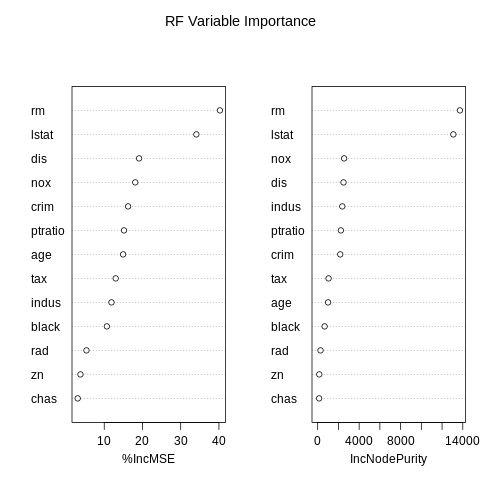

In [ ]:
%%R
# Variable importance plot
varImpPlot(final_rf_model, main="RF Variable Importance")

We can create a customized variable importance plot with ggplot2:

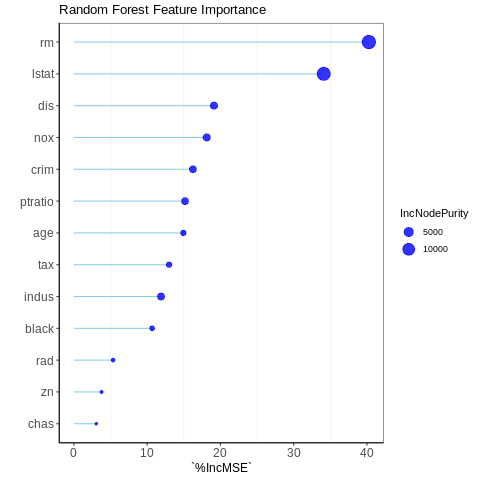

In [ ]:
%%R
# Get variable importance from the model fit
ImpData <- as.data.frame(randomForest::importance(final_rf_model))
ImpData$Var.Names <- row.names(ImpData)
# Plot importance
ggplot(ImpData, aes(y=`%IncMSE`, x=reorder(Var.Names, +`%IncMSE`))) +
  geom_segment( aes(x=reorder(Var.Names, +`%IncMSE`), xend=Var.Names, y=0, yend=`%IncMSE`), color="skyblue") +
  geom_point(aes(size = IncNodePurity), color="blue", alpha=0.8) +
  ylab('`%IncMSE`') +
  xlab('')+
  theme_bw() +
  theme(axis.line = element_line(colour = "black"),
        panel.grid.major = element_blank(),
        axis.text.y=element_text(size=12),
        axis.text.x = element_text(size=12),
        axis.title.x = element_text(size=12),
        axis.title.y = element_text(size=12))+
  coord_flip()+
  ggtitle("Random Forest Feature Importance")

## Random Forest Model using {ranger} package

The [{ranger}](https://cran.r-project.org/package=ranger) package in R is a fast and efficient implementation of Random Forest for classification, regression, and survival analysis. Written in C++ for performance, it handles large datasets and high-dimensional data well, with support for parallel computing. Key features include permutation-based variable importance, out-of-bag (OOB) error estimation, and flexible tuning options like `mtry` and `num.trees.` It’s optimized for speed and memory efficiency compared to the {randomForest} package, making it ideal for big data applications.

The {ranger} package is designed for efficient Random Forest modeling, supporting classification, regression, and survival analysis.

Main Functions of the `{ranger}` Package:

1.  `ranger()`: Fits a Random Forest model for classification, regression, or survival tasks.
    -   **Key Arguments**:
        -   `formula`: Specifies the model (e.g., `y ~ x1 + x2`).
        -   `data`: Input data frame.
        -   `num.trees`: Number of trees (default: 500).
        -   `mtry`: Number of features to consider at each split (default: $\sqrt{p}$ for classification, $p/3$ for regression).
        -   `importance`: Computes variable importance (`"none"`, `"permutation"`, or `"impurity"`).
        -   `probability`: For classification, returns class probabilities if `TRUE`.
        -   `keep.inbag`: Stores in-bag observations for OOB calculations.
2.  `predict.ranger()`: Generates predictions from a fitted `ranger` model on new data.

-   **Key Arguments**:
    -   `object`: A fitted `ranger` model.
    -   `data`: New data for predictions.
    -   `type`: Prediction type (`"response"`, `"prob"`, or `"survival"`).

3.  `importance()`: Extracts variable importance from a `ranger` model.
    -   **Key Arguments**:
        -   `x`: A fitted `ranger` model with `importance` enabled.
4.  `holdoutRF()`: Fits a holdout Random Forest, splitting data into two subsets to estimate variable importance with reduced bias.
    -   **Key Arguments**:
        -   Similar to `ranger()` (e.g., `formula`, `data`, `num.trees`).
5.  `tuneRanger()`: (Available in related {tuneRanger} package but often used with `ranger`) Tunes hyperparameters (`mtry`, `min.node.size`, etc.) using cross-validation.

### Classification Example

#### Data

For classification, we will use the {ranger} packages to build a Random Forest model on [Health Iinsurance](http://peopleanalytics-regression-book.org/data/health_insurance.csv) data. The dataset contains information about individuals' choices of insurance products based on various features.


In [ ]:
%%R
# Load data
mf<-readr::read_csv("https://github.com/zia207/r-colab/raw/main/Data/Machine_Learning/health_insurance.csv")
# convert factor
mf$product <- as.factor(mf$product)
mf$gender <- as.factor(mf$gender)
# Split Data to Train and Test
seeds = 11076
tr_prop = 0.70
# training data (70% data)
train= ddply(mf,.(product, gender ),
                 function(., seed) { set.seed(seed); .[sample(1:nrow(.), trunc(nrow(.) * tr_prop)), ] }, seed = 101)
test = ddply(mf, .(product , gender),
            function(., seed) { set.seed(seed); .[-sample(1:nrow(.), trunc(nrow(.) * tr_prop)), ] }, seed = 101)

Rows: 1448 Columns: 6
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (2): product, gender
dbl (4): age, household, position_level, absent

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


#### Fit Random Forest model using ranger

The main arguments of the `ranger()` function are:

- **num.trees**: Number of trees (default: 500).
- **mtry**: Number of variables per split (default: `sqrt(p)` for classification, `p/3` for regression).
- **importance**: Variable importance method (`"none"`, `"impurity"`, `"permutation"`).
- **write.forest**: Save forest for predictions (default: `TRUE`).
- **probability**: For classification probabilities (default: `FALSE`).
- **min.node.size**: Minimum node size (default: 1 for classification, 5 for regression).
- **max.depth**: Max tree depth (default: 0, unlimited).
- **replace**: Bootstrap sampling (default: `TRUE`).
- **sample.fraction**: Fraction of data sampled (default: 1 or 0.632).
- **case.weights**: Observation weights.
- **class.weights**: Class weights for classification.
- **splitrule**: Node splitting rule (e.g., `"gini"`, `"variance"`).
- **seed**: Random seed for reproducibility.
- **verbose**: Print progress (default: `TRUE`).

In [ ]:
%%R
# Fit Random Forest model using ranger
set.seed(11076)
rf_model <- ranger(product ~ age + household + position_level + absent + gender,
                   data = train,
                   num.trees = 500,
                   mtry = floor(sqrt(ncol(train) - 1)), # sqrt(p) for classification
                   importance = "permutation", # Permutation-based importance
                   keep.inbag = TRUE) # Needed for OOB error plotting
rf_model

Ranger result

Call:
 ranger(product ~ age + household + position_level + absent +      gender, data = train, num.trees = 500, mtry = floor(sqrt(ncol(train) -      1)), importance = "permutation", keep.inbag = TRUE) 

Type:                             Classification 
Number of trees:                  500 
Sample size:                      1010 
Number of independent variables:  5 
Mtry:                             2 
Target node size:                 1 
Variable importance mode:         permutation 
Splitrule:                        gini 
OOB prediction error:             20.10 % 


#### Plot OOB Error vs. Number of Trees

Since ranger doesn't store error vs. trees by default; simulate by growing trees incrementally, we create a function to grow trees incrementally and calculate OOB error for each tree. This is done by growing trees one at a time and storing the OOB error for each tree.

In [ ]:
%%R
# Model Plot: OOB error vs. number of trees
# ranger doesn't store error vs. trees by default; simulate by growing trees incrementally
oob_errors <- numeric(500)
for (i in 1:500) {
  set.seed(11076)
  rf_temp <- ranger(product ~ age + household + position_level + absent + gender,
                    data = train,
                    num.trees = i,
                    mtry = floor(sqrt(ncol(train) - 1)),
                    keep.inbag = TRUE)
  oob_errors[i] <- rf_temp$prediction.error
}
error_df <- data.frame(Trees = 1:500, OOB_Error = oob_errors)
head(error_df)

  Trees OOB_Error
1     1 0.2387268
2     2 0.2344498
3     3 0.2387097
4     4 0.2400932
5     5 0.2352941
6     6 0.2352941


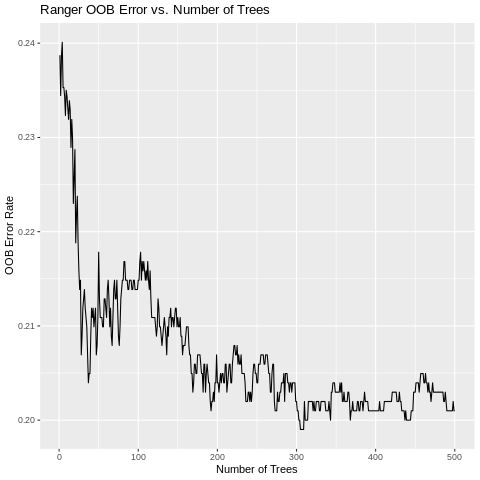

In [ ]:
%%R
## plot OOB error vs. number of trees
ggplot(error_df, aes(x = Trees, y = OOB_Error)) +
  geom_line() +
  ggtitle("Ranger OOB Error vs. Number of Trees") +
  xlab("Number of Trees") +
  ylab("OOB Error Rate")

In [ ]:
%%R
# Error: Print OOB error rate
cat("OOB Error Rate:", rf_model$prediction.error, "\n")

OOB Error Rate: 0.2009901 


#### Variable Importance

In [ ]:
%%R
# Variable Importance
var_imp <- as.data.frame(rf_model$variable.importance)
var_imp$Variable <- names(rf_model$variable.importance)
colnames(var_imp)[1] <- "Importance"
var_imp <- var_imp[order(var_imp$Importance, decreasing = TRUE), ]
cat("Variable Importance:\n")
print(var_imp)

Variable Importance:
                 Importance       Variable
age             0.243749029            age
household       0.172723548      household
gender          0.045277378         gender
position_level  0.026449479 position_level
absent         -0.001477455         absent


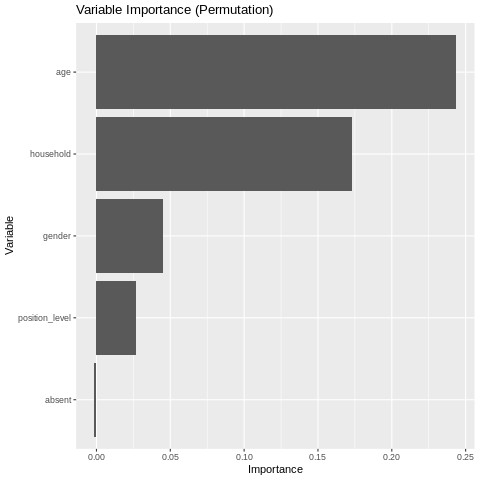

In [ ]:
%%R
# Plot variable importance
ggplot(var_imp, aes(x = reorder(Variable, Importance), y = Importance)) +
  geom_bar(stat = "identity") +
  coord_flip() +
  ggtitle("Variable Importance (Permutation)") +
  xlab("Variable") +
  ylab("Importance")

#### Prediction and Evaluation

In [ ]:
%%R
# Predictions on test set
test$pred <- predict(rf_model, data = test)$predictions

In [ ]:
%%R
# Confusion Matrix
confusion_matrix<- table(Actual = test$product, Predicted = test$pred)
confusion_matrix

      Predicted
Actual   A   B   C
     A 117  20  12
     B  13 117   8
     C  15  20 116


In [ ]:
%%R
# define variables
    TP <- confusion_matrix[2, 2]
    TN <- confusion_matrix[1, 1]
    FP <- confusion_matrix[2, 1]
    FN <- confusion_matrix[1, 2]

    # accuracy
    accuracy <- (TP + TN) / sum(confusion_matrix)

    # precision
    precision <- TP / (TP + FP)

    # Recall
    recall <- TP / (TP + FN)

    # specificity
    specificity <- TN / (TN + FP)

    # f1_score
    f1_score <- 2 * (precision * recall) / (precision + recall)

    # Print the results
    cat("Accuracy:", accuracy, "\n")
    cat("Precision:", precision, "\n")
    cat("Recall:", recall, "\n")
    cat("Specificity:", specificity, "\n")
    cat("F1 Score:", f1_score, "\n")

Accuracy: 0.5342466 
Precision: 0.9 
Recall: 0.8540146 
Specificity: 0.9 
F1 Score: 0.8764045 


In [ ]:
%%R
# Per-class Accuracy
per_class_acc <- diag(confusion_matrix) / rowSums(confusion_matrix)
cat("Per-class Accuracy:\n")
print(data.frame(Class = levels(test$product), Accuracy = per_class_acc))


Per-class Accuracy:
  Class  Accuracy
A     A 0.7852349
B     B 0.8478261
C     C 0.7682119


#### Cross-Validation

To perform 5-fold cross-validation using the {ranger} package,  we'll use default settings for the random forest model.




In [ ]:
%%R
## Define 5-fold cross-validation
set.seed(seeds)
folds <- 5
n <- nrow(mf)
fold_indices <- sample(rep(1:folds, length.out = n))

# Cross-validation loop
accuracies <- numeric(folds)
for(f in 1:folds) {
  train_fold <- mf[fold_indices != f, ]
  val_fold <- mf[fold_indices == f, ]
  # Fit Random Forest model on training fold
  rf_model <- ranger(
    formula = product ~ age + household + position_level + absent + gender,
    data = train_fold,
    num.trees = 500,
    seed = seeds
  )

  pred <- predict(rf_model, data = val_fold)$predictions
  accuracies[f] <- mean(pred == val_fold$product)
}

# Cross-validation results
cat("Cross-validation accuracies per fold:", accuracies, "\n")
cat("Mean CV accuracy:", mean(accuracies), "\n")

Cross-validation accuracies per fold: 0.7970297 0.7673267 0.8118812 0.7920792 0.8118812 
Mean CV accuracy: 0.7960396 


#### Hyperparameter Tuning with `tuneRanger()`

The `{tuneRanger}` package in R is designed for hyperparameter tuning of random forest models built with the `{ranger}` package. It uses model-based optimization (MBO) to efficiently tune parameters like `mtry`, `min.node.size`, and `sample.fraction`, optimizing metrics such as classification error or Brier score. It leverages out-of-bag predictions for fast evaluation, avoiding the need for cross-validation, and integrates with the `{mlr}` package for task management. Ideal for improving `{ranger}` model performance with minimal manual tuning.

In [ ]:
%%R
options(warn=-1)
# set seeds
seeds <- 11076

# Create mlr task for tuneRanger
task <- makeClassifTask(data = train, target = "product")

# Estimate tuning time
estimateTimeTuneRanger(task)

# Perform hyperparameter tuning with tuneRanger
set.seed(seeds) # Set seed for reproducibility
res <- tuneRanger(
  task = task,
  measure = list(multiclass.brier), # Optimize for Brier score
  num.trees = 500,
  num.threads = 2,
  iters = 70 # Number of MBO iterations
)

# Train final model with tuned hyperparameters
final_rf <- ranger(
  formula = product ~ age + household + position_level + absent + gender,
  data = train,
  num.trees = 500,
  mtry = res$recommended.pars$mtry,
  min.node.size = res$recommended.pars$min.node.size,
  sample.fraction = res$recommended.pars$sample.fraction,
  splitrule = "gini",
  seed = seeds
)



In [ ]:
%%R
# Evaluate on test set
test_pred <- predict(final_rf, data = test)$predictions
test_accuracy <- mean(test_pred == test$product)
cat("Test set accuracy:", test_accuracy, "\n")

# Confusion matrix
conf_matrix <- table(Predicted = test_pred, Actual = test$product)
cat("Confusion matrix:\n")
print(conf_matrix)

Test set accuracy: 0.8173516 
Confusion matrix:
         Actual
Predicted   A   B   C
        A 128   8  20
        B  21 121  22
        C   0   9 109


### Regression Example

In this section, we will build a Random Forest regression model using the {ranger} package in R. We will use a dataset containing soil organic carbon (SOC) data and various environmental predictors.

#### Data



In [7]:
%%R
# Load Boston Housing dataset from MASS
data(Boston)

# Create a data frame with selected variables
df <- Boston %>%
  dplyr::select(medv, crim, zn, indus, chas, nox, rm, age, dis, rad, tax, ptratio, black, lstat)

# Convert chas to factor (categorical variable)
df$chas <- as.factor(df$chas)

# Convert rad and tax to numeric to avoid scaling errors
df$rad <- as.numeric(df$rad)
df$tax <- as.numeric(df$tax)

# Verify data types
str(df)

# Set seed for reproducibility
seeds <- 11076
tr_prop <- 0.70

# Split data into training (70%) and test sets using stratified sampling by chas
train <- ddply(df, .(chas),
               function(., seed) { set.seed(seed); .[sample(1:nrow(.), trunc(nrow(.) * tr_prop)), ] }, seed = 101)
test <- ddply(df, .(chas),
              function(., seed) { set.seed(seed); .[-sample(1:nrow(.), trunc(nrow(.) * tr_prop)), ] }, seed = 101)

# Scale the numeric features (excluding medv and chas)
numeric_cols <- c("crim", "zn", "indus", "nox", "rm", "age", "dis", "rad", "tax", "ptratio", "black", "lstat")
train[numeric_cols] <- scale(train[numeric_cols])
test[numeric_cols] <- scale(test[numeric_cols])

'data.frame':	506 obs. of  14 variables:
 $ medv   : num  24 21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 ...
 $ crim   : num  0.00632 0.02731 0.02729 0.03237 0.06905 ...
 $ zn     : num  18 0 0 0 0 0 12.5 12.5 12.5 12.5 ...
 $ indus  : num  2.31 7.07 7.07 2.18 2.18 2.18 7.87 7.87 7.87 7.87 ...
 $ chas   : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...
 $ nox    : num  0.538 0.469 0.469 0.458 0.458 0.458 0.524 0.524 0.524 0.524 ...
 $ rm     : num  6.58 6.42 7.18 7 7.15 ...
 $ age    : num  65.2 78.9 61.1 45.8 54.2 58.7 66.6 96.1 100 85.9 ...
 $ dis    : num  4.09 4.97 4.97 6.06 6.06 ...
 $ rad    : num  1 2 2 3 3 3 5 5 5 5 ...
 $ tax    : num  296 242 242 222 222 222 311 311 311 311 ...
 $ ptratio: num  15.3 17.8 17.8 18.7 18.7 18.7 15.2 15.2 15.2 15.2 ...
 $ black  : num  397 397 393 395 397 ...
 $ lstat  : num  4.98 9.14 4.03 2.94 5.33 ...


#### Fit Random Forest Model

In [8]:
%%R
# Fit Random Forest regression model using ranger
set.seed(seeds)
rf_model <- ranger(medv ~ crim + zn + indus + chas + nox + rm + age + dis + rad + tax + ptratio + black + lstat,
                   data = train,
                   num.trees = 500,
                   mtry = floor(13 / 3), # p/3 for regression, p = 13 predictors
                   importance = "permutation", # Permutation-based importance
                   keep.inbag = TRUE)
rf_model

Ranger result

Call:
 ranger(medv ~ crim + zn + indus + chas + nox + rm + age + dis +      rad + tax + ptratio + black + lstat, data = train, num.trees = 500,      mtry = floor(13/3), importance = "permutation", keep.inbag = TRUE) 

Type:                             Regression 
Number of trees:                  500 
Sample size:                      353 
Number of independent variables:  13 
Mtry:                             4 
Target node size:                 5 
Variable importance mode:         permutation 
Splitrule:                        variance 
OOB prediction error (MSE):       12.04691 
R squared (OOB):                  0.8573228 


#### Plot OOB Error vs. Number of Trees


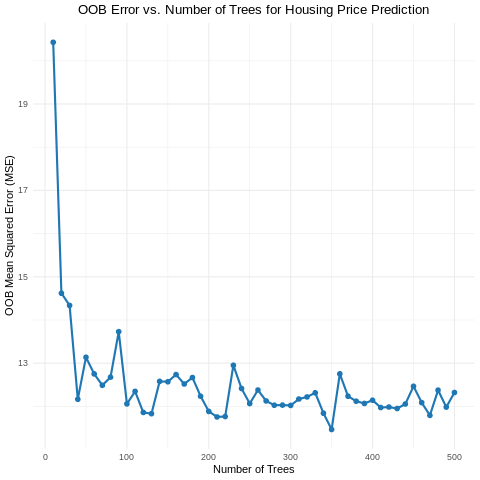

In [9]:
%%R
tree_seq <- seq(10, 500, by = 10) # Number of trees from 10 to 500, step 10
oob_mse <- numeric(length(tree_seq))

# Loop over number of trees and compute OOB MSE
set.seed(seeds)
for (i in seq_along(tree_seq)) {
  rf.model <- ranger(medv ~ crim + zn + indus + chas + nox + rm + age + dis + rad + tax + ptratio + black + lstat,
                     data = train,
                     num.trees = tree_seq[i],
                     mtry = floor(13 / 3), # p/3 for regression, p = 13 predictors
                     keep.inbag = TRUE)
  oob_mse[i] <- rf.model$prediction.error
}

# Create data frame for plotting
oob_df <- data.frame(NumTrees = tree_seq, OOB_MSE = oob_mse)

# Plot OOB Error vs. Number of Trees
ggplot(oob_df, aes(x = NumTrees, y = OOB_MSE)) +
  geom_line(color = "#1f77b4", size = 1) +
  geom_point(color = "#1f77b4", size = 2) +
  ggtitle("OOB Error vs. Number of Trees for Housing Price Prediction") +
  xlab("Number of Trees") +
  ylab("OOB Mean Squared Error (MSE)") +
  theme_minimal() +
  theme(plot.title = element_text(hjust = 0.5))

#### Feature Importance

In [10]:
%%R
# Feature Importance
var_imp <- as.data.frame(rf_model$variable.importance)
var_imp$Variable <- names(rf_model$variable.importance)
colnames(var_imp)[1] <- "Importance"
var_imp$Type <- ifelse(var_imp$Variable == "chas", "Categorical", "Numeric")
var_imp$Importance <- ifelse(var_imp$Variable == "chas",
                            var_imp$Importance / 100, # Scale down categorical importance for comparison
                            var_imp$Importance)
var_imp <- var_imp[order(var_imp$Importance, decreasing = TRUE), ]
# Impurity-based importance (IncNodePurity)
impurity_imp <- importance(rf_model, type = "impurity")
impurity_df <- data.frame(Variable = names(impurity_imp), IncNodePurity = impurity_imp)
impurity_df$Type <- ifelse(impurity_df$Variable == "chas", "Categorical", "Numeric")
impurity_df <- impurity_df[order(impurity_df$IncNodePurity, decreasing = TRUE), ]
cat("\nFeature Importance (IncNodePurity):\n")
print(impurity_df[, c("Variable", "IncNodePurity", "Type")])


Feature Importance (IncNodePurity):
        Variable IncNodePurity        Type
lstat      lstat     54.871020     Numeric
rm            rm     34.796326     Numeric
ptratio  ptratio      9.462995     Numeric
nox          nox      8.385170     Numeric
crim        crim      6.975535     Numeric
dis          dis      6.962216     Numeric
indus      indus      6.469422     Numeric
age          age      4.494609     Numeric
tax          tax      4.317322     Numeric
black      black      1.600928     Numeric
zn            zn      1.341508     Numeric
rad          rad      1.115672     Numeric
chas        chas      1.018860 Categorical


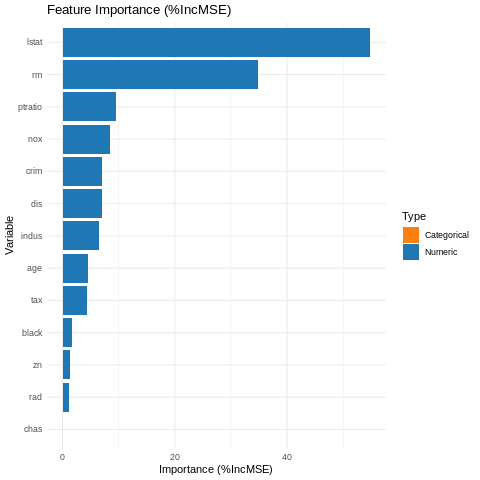

In [11]:
%%R
# Plot feature importance (%IncMSE)
ggplot(var_imp, aes(x = reorder(Variable, Importance), y = Importance, fill = Type)) +
  geom_bar(stat = "identity") +
  coord_flip() +
  ggtitle("Feature Importance (%IncMSE)") +
  xlab("Variable") +
  ylab("Importance (%IncMSE)") +
  theme_minimal() +
  scale_fill_manual(values = c("Numeric" = "#1f77b4", "Categorical" = "#ff7f0e"))

#### Prediction and Evaluation

In [12]:
%%R
test$pred <- predict(rf_model, data = test)$predictions

# Model Performance: RMSE and R²
rmse <- sqrt(mean((test$medv - test$pred)^2))
r2 <- cor(test$medv, test$pred)^2
cat("\nTest Set Performance:\n")
cat("RMSE:", rmse, "\n")
cat("R²:", r2, "\n")


Test Set Performance:
RMSE: 3.709869 
R²: 0.862821 


#### Cross-Validation

In [ ]:
%%R
# Create a data frame with selected variables
mf <- Boston %>%
  dplyr::select(medv, crim, zn, indus, chas, nox, rm, age, dis, rad, tax, ptratio, black, lstat)

# Convert chas to factor for regression
mf$chas <- as.factor(mf$chas)

# Convert rad and tax to numeric to avoid scaling issues
mf$rad <- as.numeric(mf$rad)
mf$tax <- as.numeric(mf$tax)

# Verify medv is numeric
if (!is.numeric(mf$medv)) stop("medv is not numeric. Check data.")

# Scale numeric features (excluding medv and chas)
numeric_cols <- c("crim", "zn", "indus", "nox", "rm", "age", "dis", "rad", "tax", "ptratio", "black", "lstat")
mf[numeric_cols] <- scale(mf[numeric_cols])
# Define 5-fold cross-validation
set.seed(seeds)
folds <- 5
n <- nrow(mf)
fold_indices <- sample(rep(1:folds, length.out = n))

# Cross-validation loop
mse <- numeric(folds)
for (f in 1:folds) {
  train_fold <- mf[fold_indices != f, ]
  val_fold <- mf[fold_indices == f, ]

  rf_model <- ranger(medv ~ crim + zn + indus + chas + nox + rm + age + dis + rad + tax + ptratio + black + lstat,
                     data = train_fold,
                     num.trees = 500,
                     mtry = floor(13 / 3), # p/3 for regression, p = 13 predictors
                     seed = seeds)

  pred <- predict(rf_model, data = val_fold)$predictions
  mse[f] <- mean((pred - val_fold$medv)^2)
}

# Cross-validation results
cat("Cross-validation MSE per fold:", mse, "\n")
cat("Mean CV MSE:", mean(mse), "\n")
cat("Mean CV RMSE:", sqrt(mean(mse)), "\n")

Cross-validation MSE per fold: 7.285741 28.39433 7.184824 6.844231 11.57007 
Mean CV MSE: 12.25584 
Mean CV RMSE: 3.500834 


#### Hyperparameter Tuning with `tuneRanger()`


Since {mlr} is deprecated, I’ll provide an alternative using {mlr3}, {mlr3tuning}, and {mlr3learners} for hyperparameter tuning with a random forest learner (ranger). This approach modernizes the workflow and avoids issues related to {mlr}. **There may be possibilities of crashing the R session.**  

In [ ]:
%%R
# Create a data frame with selected variables
mf <- Boston %>%
  dplyr::select(medv, crim, zn, indus, chas, nox, rm, age, dis, rad, tax, ptratio, black, lstat)

# Convert chas to factor (already a factor in the dataset, but ensuring consistency)
mf$chas <- as.factor(mf$chas)

# Split data into training and test sets (80/20 split)
set.seed(123)
train_idx <- sample(1:nrow(mf), 0.8 * nrow(mf))
train <- mf[train_idx, ]
test <- mf[-train_idx, ]

# Define feature columns (excluding target 'medv')
feature_cols <- c("crim", "zn", "indus", "chas", "nox", "rm", "age", "dis", "rad", "tax", "ptratio", "black", "lstat")

# Ensure consistent columns in train and test sets
if (!all(feature_cols %in% colnames(train)) || !all(feature_cols %in% colnames(test))) {
  stop("Feature columns missing in train or test set.")
}
if (!identical(colnames(train[, feature_cols]), colnames(test[, feature_cols]))) {
  stop("Feature column names or order differ between train and test sets.")
}

# Scale numeric features (excluding 'chas' which is categorical and 'medv' which is the target)
numeric_cols <- c("crim", "zn", "indus", "nox", "rm", "age", "dis", "rad", "tax", "ptratio", "black", "lstat")
train[numeric_cols] <- scale(train[numeric_cols])
test[numeric_cols] <- scale(test[numeric_cols])

# Create mlr3 regression task for training
task <- as_task_regr(train[, c("medv", feature_cols)], target = "medv")

# Define ranger learner with permutation importance
learner <- lrn("regr.ranger", num.trees = 500, num.threads = 2, importance = "permutation")

# Define parameter space for tuning
param_set <- ps(
  mtry = p_int(lower = 1, upper = length(feature_cols)), # Number of predictors
  min.node.size = p_int(lower = 1, upper = 50),
  sample.fraction = p_dbl(lower = 0.1, upper = 1)
)

# Define tuning strategy (random search) and terminator
tuner <- tnr("random_search")
terminator <- trm("evals", n_evals = 70) # 70 iterations

# Set up auto-tuner
at <- AutoTuner$new(
  learner = learner,
  resampling = rsmp("cv", folds = 5), # 5-fold CV
  measure = msr("regr.mse"), # Mean squared error
  search_space = param_set,
  terminator = terminator,
  tuner = tuner
)

# Perform tuning
set.seed(123)
at$train(task)

# Print tuned parameters
cat("Tuned parameters:\n")
print(at$tuning_result)

# Train final model with tuned hyperparameters
final_learner <- lrn("regr.ranger",
                     num.trees = 500,
                     mtry = at$tuning_result$mtry,
                     min.node.size = at$tuning_result$min.node.size,
                     sample.fraction = at$tuning_result$sample.fraction,
                     num.threads = 2,
                     importance = "permutation")
final_learner$train(task)

# Create mlr3 regression task for test set with same features
test_task <- as_task_regr(test[, c("medv", feature_cols)], target = "medv")
```

In [ ]:
# Evaluate on test set
pred <- final_learner$predict(test_task)
test_mse <- pred$score(msr("regr.mse"))
test_rmse <- sqrt(test_mse)
test_r2 <- pred$score(msr("regr.rsq"))
cat("Test set MSE:", test_mse, "\n")
cat("Test set RMSE:", test_rmse, "\n")
cat("Test set R-squared:", test_r2, "\n")


## Random Forest Model using {randomForestSRC} package

The R package **{randomForestSRC}** is a versatile tool for performing random forest analyses, designed for survival, regression, and classification tasks. It extends the capabilities of traditional random forests by offering support for high-dimensional data, time-to-event (survival) analysis, and competing risks, alongside standard regression and classification. Key features include fast computation, parallel processing, and robust handling of missing data through imputation. The package provides flexible options for variable importance, partial dependence plots, and prediction, making it suitable for both predictive modeling and exploratory data analysis. It is widely used in fields like bioinformatics, finance, and machine learning for its efficiency and comprehensive functionality.

Below is a brief description of key functions used in the provided script and their roles:

- `rfsrc()`**: Fits a random forest model for regression, classification, or survival analysis. It supports high-dimensional data, custom splitting rules, and parallel processing. In the script, it models the continuous outcome `absent` using predictors like `product`, `age`, etc., with options for tree count (`ntree`) and variable importance (`importance = "permute"`).

- `vimp()`: Computes Variable Importance (VIMP) using permutation or other methods, measuring each variable’s contribution to prediction accuracy. In the script, it quantifies the importance of predictors like `age` and `gender`.

- `find.interaction()`: Performs dimension reduction by ranking variables based on minimal depth or VIMP, identifying the most predictive variables. In the script, it uses `method = "vimp"` to prioritize variables for the model.

- `predict()`: Generates predictions on new data using a fitted random forest model. In the script, it predicts `absent` for the test set to evaluate performance.

- `plot.vimp()`: Visualizes variable importance scores, helping interpret which predictors are most influential. In the script, it’s used optionally to plot VIMP results.

- `plot.variable()`: Creates partial dependence plots to show the marginal effect of predictors on the outcome. In the script, it’s included optionally for exploratory analysis.

These functions enable comprehensive random forest modeling, from fitting and prediction to variable selection and visualization, with robust support for diverse data types and analytical needs.

### Classification Example

This section demonstrates how to build a Random Forest classification model using the {randomForestSRC} package in R. We will use the Health Insurance dataset, which contains information about individuals' choices of insurance products based on various features.

#### Data

In [ ]:
%%R
# Load data
mf<-readr::read_csv("https://github.com/zia207/r-colab/raw/main/Data/Machine_Learning/health_insurance.csv")
# convert factor
mf$product <- as.factor(mf$product)
mf$gender <- as.factor(mf$gender)
# Split Data to Train and Test
seeds = 11076
tr_prop = 0.70
# training data (70% data)
train= ddply(mf,.(product, gender ),
                 function(., seed) { set.seed(seed); .[sample(1:nrow(.), trunc(nrow(.) * tr_prop)), ] }, seed = 101)
test = ddply(mf, .(product , gender),
            function(., seed) { set.seed(seed); .[-sample(1:nrow(.), trunc(nrow(.) * tr_prop)), ] }, seed = 101)

Rows: 1448 Columns: 6
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (2): product, gender
dbl (4): age, household, position_level, absent

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


#### Fit Random Forest Model

We will use `rfsrc()` function from the {randomForestSRC} package to fit a Random Forest classification model. The main arguments of the `rfsrc()` function are:

In [ ]:
%%R
# Fit random forest classification model
rf_model <- rfsrc(product ~ age + household + position_level + gender + absent,
                  data = train,
                  ntree = 500,
                  importance = "permute",  # Enable VIMP calculation
                  seed = seeds)

# Print model summary
print(rf_model)

                         Sample size: 1010
           Frequency of class labels: 344, 319, 347
                     Number of trees: 500
           Forest terminal node size: 1
       Average no. of terminal nodes: 160.252
No. of variables tried at each split: 3
              Total no. of variables: 5
       Resampling used to grow trees: swor
    Resample size used to grow trees: 638
                            Analysis: RF-C
                              Family: class
                      Splitting rule: gini *random*
       Number of random split points: 10
                   (OOB) Brier score: 0.09489775
        (OOB) Normalized Brier score: 0.42703988
                           (OOB) AUC: 0.94016353
                      (OOB) Log-loss: 0.43678541
   (OOB) Requested performance error: 0.21584158, 0.18895349, 0.21003135, 0.24783862

Confusion matrix:

          predicted
  observed   A   B   C class.error
         A 279  38  27      0.1890
         B  37 252  30      0.2100
      

There are helper functions for directly calculating error performance. The functions `get.auc(0`) and `get.brier.error(0`) can be used to directly obtain OOB Brier score and OOB AUC values:

In [ ]:
%%R
get.auc(train$product, rf_model$predicted.oob)

[1] 0.9401635


In [ ]:
%%R
get.brier.error(train$product, rf_model$predicted.oob)

[1] 0.4270399


#### Plot OOB Error vs. Number of Trees


                     all        A         B         C
age               0.2411   1.2883    0.2130    0.4144
household         0.1694   0.0174    1.0433    0.3495
gender            0.0488   0.0931    0.2705    0.0414
position_level    0.0351   0.0316    0.2740   -0.0085
absent           -0.0077   0.0068   -0.0387   -0.0316


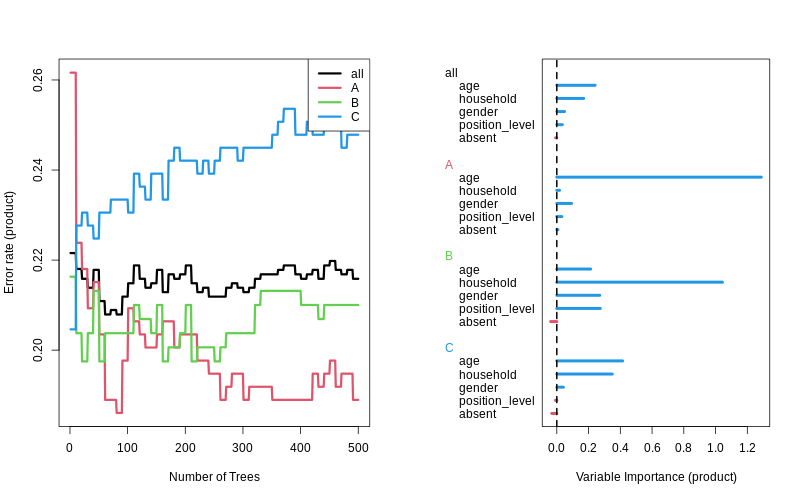

In [ ]:
%%R -w 800 -h 500
plot(rf_model, main = "Random Forest Model for Product Prediction",
     xlab = "Number of Trees", ylab = "OOB Error Rate",
     col = "blue", lwd = 2, cex.main = 1.5, cex.lab = 1.2)

#### Prediction and Evaluation

In [ ]:
%%R
# Predict on test data
pred_rf <- predict(rf_model, newdata = test)

# Calculate misclassification error rate
actual <- test$product
predicted <- pred_rf$class
misclass_error <- mean(predicted != actual)

# Print performance measure
cat("Misclassification Error Rate:", misclass_error, "\n")

Misclassification Error Rate: 0.2009132 


####  Dimension reduction using minimal depth

`find.interaction()` function identify pairwise interactions for all pairs of variables from a specified list. There are two distinct approaches specified by the option method.

`method="maxsubtree"`: This invokes a maximal subtree analysis.

`method="vimp"`: ranks variables by minimal depth, identifying key predictors for product.


In [ ]:
%%R
# Perform dimension reduction using minimal depth
md_rf <- find.interaction(rf_model, method = "vimp")
print(md_rf)

Pairing age with household 
Pairing age with gender 
Pairing age with position_level 
Pairing age with absent 
Pairing household with gender 
Pairing household with position_level 
Pairing household with absent 
Pairing gender with position_level 
Pairing gender with absent 
Pairing position_level with absent 

                              Method: vimp
                    No. of variables: 5
           Variables sorted by VIMP?: TRUE
   No. of variables used for pairing: 5
    Total no. of paired interactions: 10
            Monte Carlo replications: 1
    Type of noising up used for VIMP: permute

                          Var 1   Var 2 Paired Additive Difference
age:household            0.2422  0.1702 0.3906   0.4124    -0.0219
age:gender               0.2422  0.0466 0.2730   0.2888    -0.0159
age:position_level       0.2422  0.0342 0.2429   0.2764    -0.0336
age:absent               0.2422 -0.0094 0.2354   0.2329     0.0025
household:gender         0.1703  0.0452 0.2075   0.2154   

#### Variable Importance (VIMP) and Partial Plot

For variable selection, Variable Importance (VIMP) measures the predictive contribution of each predictor using a prediction-based approach, estimating the increase in prediction error when a predictor is randomly permuted into noise (see VIMP vignette for details). VIMP is expressed as the percentage increase in standardized Mean Squared Error (MSE). Positive VIMP values indicate predictors that enhance model accuracy after accounting for other variables. Standard errors and p-values can be computed using `bootstrapping`, `subsampling`, or `delete-d-jackknife` methods.

Partial dependence plots are another valuable tool for interpreting random forest results. These plots show the predicted conditional mean of the outcome as a function of a specific predictor. For example, a partial dependence plot for the predictor "Month" reveals that ozone levels peak around August, as illustrated in the figure below (right).

In [ ]:
%%R
var <- subsample(rf_model, B= 50, bootstrap = FALSE,
                 verbose = FALSE)
# take a delete-d-jackknife procedure for example
vimpCI <- extract.subsample(var)$var.jk.sel.Z
vimpCI

In [ ]:
%%R
# Confidence Intervals for VIMP
plot.subsample(var)
# take the variable "gender" for example for partial plot
plot.variable(rf_model, xvar.names = "gender", partial = TRUE)

### Regression Example



#### Data

In [ ]:
%%R
# Create a data frame with selected variables
df <- Boston %>%
  dplyr::select(medv, crim, zn, indus, chas, nox, rm, age, dis, rad, tax, ptratio, black, lstat)

# Convert chas to factor (categorical variable)
df$chas <- as.factor(df$chas)

# Convert rad and tax to numeric (in case they are integers or factors)
df$rad <- as.numeric(df$rad)
df$tax <- as.numeric(df$tax)

# Verify data types
str(df)

# Split data into training (70%) and test (30%) sets, stratified by chas
seeds <- 11076
tr_prop <- 0.70
set.seed(seeds)

# Stratified sampling for training data
train <- ddply(df, .(chas),
               function(., seed) { set.seed(seed); .[sample(1:nrow(.), trunc(nrow(.) * tr_prop)), ] },
               seed = seeds)
test <- ddply(df, .(chas),
              function(., seed) { set.seed(seed); .[-sample(1:nrow(.), trunc(nrow(.) * tr_prop)), ] },
              seed = seeds)

# Scale the numeric features (exclude medv and chas)
numeric_cols <- c("crim", "zn", "indus", "nox", "rm", "age", "dis", "rad", "tax", "ptratio", "black", "lstat")
train[numeric_cols] <- scale(train[numeric_cols])
test[numeric_cols] <- scale(test[numeric_cols])

'data.frame':	506 obs. of  14 variables:
 $ medv   : num  24 21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 ...
 $ crim   : num  0.00632 0.02731 0.02729 0.03237 0.06905 ...
 $ zn     : num  18 0 0 0 0 0 12.5 12.5 12.5 12.5 ...
 $ indus  : num  2.31 7.07 7.07 2.18 2.18 2.18 7.87 7.87 7.87 7.87 ...
 $ chas   : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...
 $ nox    : num  0.538 0.469 0.469 0.458 0.458 0.458 0.524 0.524 0.524 0.524 ...
 $ rm     : num  6.58 6.42 7.18 7 7.15 ...
 $ age    : num  65.2 78.9 61.1 45.8 54.2 58.7 66.6 96.1 100 85.9 ...
 $ dis    : num  4.09 4.97 4.97 6.06 6.06 ...
 $ rad    : num  1 2 2 3 3 3 5 5 5 5 ...
 $ tax    : num  296 242 242 222 222 222 311 311 311 311 ...
 $ ptratio: num  15.3 17.8 17.8 18.7 18.7 18.7 15.2 15.2 15.2 15.2 ...
 $ black  : num  397 397 393 395 397 ...
 $ lstat  : num  4.98 9.14 4.03 2.94 5.33 ...


#### Fit Random Forest Model

In [ ]:
%%R
# Fit random forest regression model
rf_model <- rfsrc(medv ~ crim + zn + indus + chas + nox + rm + age + dis + rad + tax + ptratio + black + lstat,
                  data = train,
                  ntree = 100,
                  importance = "permute",  # Enable VIMP calculation
                  seed = seeds)

# Print model summary
print(rf_model)

                         Sample size: 353
                     Number of trees: 100
           Forest terminal node size: 5
       Average no. of terminal nodes: 46.86
No. of variables tried at each split: 5
              Total no. of variables: 13
       Resampling used to grow trees: swor
    Resample size used to grow trees: 223
                            Analysis: RF-R
                              Family: regr
                      Splitting rule: mse *random*
       Number of random split points: 10
                     (OOB) R squared: 0.84642487
   (OOB) Requested performance error: 12.65673029



#### Feature Importance

In [ ]:
%%R
var <- subsample(rf_model, verbose = FALSE)
# take a delete-d-jackknife procedure for example
vimpCI <- extract.subsample(var)$var.jk.sel.Z
vimpCI

In [ ]:
%%R
# Confidence Intervals for VIMP
plot.subsample(var)
# Partial plot for the variable "rm" (average number of rooms, a key predictor)
plot.variable(rf_model, xvar.names = "rm", partial = TRUE)

#### Perform dimension reduction using minimal depth

In [ ]:
%%R
# Perform dimension reduction using minimal depth
md_rf <- find.interaction(rf_model, method = "vimp")
print(md_rf)

#### Prediction anf Evaluation

In [ ]:
%%R
# Predict on test data
pred_rf <- predict(rf_model, newdata = test)

# Calculate Mean Squared Error (MSE) for performance evaluation
actual <- test$medv
predicted <- pred_rf$predicted
mse <- mean((predicted - actual)^2)

# Print performance measure
cat("Mean Squared Error (MSE):", mse, "\n")

Mean Squared Error (MSE): 16.49541 


## Summary and Conclusion

This notebook provides a comprehensive overview of the Random Forest algorithm, covering its theoretical foundations, key characteristics, and implementation details. It demonstrates how to build Random Forest models in R from scratch and using popular packages like {randomForest}, {ranger}, and {randomForestSRC} for both classification and regression tasks. The notebook also explains important concepts such as bagging, feature importance, cross-validation, and hyperparameter tuning, illustrating their application with practical examples using real-world datasets like Iris, Boston Housing, and Health Insurance. Overall, the notebook serves as a valuable resource for understanding and applying Random Forest in R for various machine learning problems.


## References

### Books

Below is a list of five important books that cover Random Forest, either directly or as part of broader machine learning and statistical learning topics. These books are widely recognized for their clarity, depth, and relevance to understanding Random Forest and related ensemble methods.

1.  `The Elements of Statistical Learning: Data Mining, Inference, and Prediction` by Trevor Hastie, Robert Tibshirani, and Jerome Friedman

2.  `An Introduction to Statistical Learning: with Applications in R` by Gareth James, Daniela Witten, Trevor Hastie, and Robert Tibshirani

3.  `Machine Learning with R: Expert Techniques for Predictive Modeling` by Brett Lantz

4.  `Applied Predictive Modeling` by Max Kuhn and Kjell Johnson

5.  `Pattern Recognition and Machine Learning` by Christopher M. Bishop

### Online Resources

1.  [Random Forest in R](https://www.r-bloggers.com/2021/04/random-forest-in-r/)

2.  [Tuning random forest hyperparameters with #TidyTuesday trees data](https://juliasilge.com/blog/sf-trees-random-tuning/)

3.  [GBM_RandomForest_Example.R](https://github.com/h2oai/h2o-tutorials/blob/master/tutorials/gbm-randomforest/GBM_RandomForest_Example.R)

4.  [Training and Turning Parameters for Random Forest Using h2o Package](https://rpubs.com/chidungkt/449576)

5. H. Ishwaran, M. Lu, and U. B. Kogalur. 2021. “randomForestSRC: getting started with randomForestSRC vignette.” http://randomforestsrc.org/articles/getstarted.html.

